### Further clean DELINQUENCY variables (round to 2 decimals / integerize / ...)

In [142]:
import gc
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import random
import sys
import time
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
from pandarallel import pandarallel

In [143]:
from pathlib import Path
rootpath = Path.cwd().parent
sys.path.append(os.path.join(rootpath))

In [144]:
from utils.constants import *
from utils.eda_helpers import (
    plot_missing_proportion_barchart, get_cols, plot_scatterplot, plot_target_check, 
    plot_int_feature_distribution, plot_train_test_distribution, check_overlap_missing,
    insert_row_number, plot_sampled_time_series
)
from utils.eval_helpers import (
    plot_roc_curves, plot_feature_importance, 
    amex_metric, get_final_metric_df, amex_metric_np, lgb_amex_metric
)
from utils.extraction_helpers import read_file
from utils.feature_group import (
    CATEGORY_COLUMNS, CONTINUOUS_COLUMNS, BINARY_COLUMNS,
    MEAN_FEATURES, MIN_FEATURES, MAX_FEATURES, LAST_FEATURES, NON_FEATURE_COLUMNS
)
from utils.preprocess_helpers import *

In [145]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
gc.collect()

6057

In [147]:
START = time.time()

### Read Data

In [28]:
%%time
train = read_file(f"{RAW_TRAIN_PARQUET_PATH}/delinquency1.parquet")
test = read_file(f"{RAW_TEST_PARQUET_PATH}/delinquency1.parquet")

Shape of data: (5531451, 54)
Shape of data: (11363762, 54)
CPU times: user 7.72 s, sys: 13.9 s, total: 21.6 s
Wall time: 16.1 s


In [29]:
%%time
public_test, private_test = split_public_private(test)

Public size: 5719469, Private size: 5644293
CPU times: user 3.24 s, sys: 2.77 s, total: 6.01 s
Wall time: 8.66 s


In [30]:
del test

In [31]:
%%time
labels = pd.read_csv(f"{RAW_DATA_PATH}/train_labels.csv")
if "target" not in train.columns:
    train = train.merge(labels, on="customer_ID", how="left")

CPU times: user 973 ms, sys: 880 ms, total: 1.85 s
Wall time: 2.46 s


In [32]:
train.shape, public_test.shape, private_test.shape

((5531451, 55), (5719469, 54), (5644293, 54))

In [33]:
print(get_cols(train, "D_"))

['D_39', 'D_41', 'D_42', 'D_43', 'D_44', 'D_45', 'D_46', 'D_47', 'D_48', 'D_49', 'D_50', 'D_51', 'D_52', 'D_53', 'D_54', 'D_55', 'D_56', 'D_58', 'D_59', 'D_60', 'D_61', 'D_62', 'D_63', 'D_64', 'D_65', 'D_66', 'D_68', 'D_69', 'D_70', 'D_71', 'D_72', 'D_73', 'D_74', 'D_75', 'D_76', 'D_77', 'D_78', 'D_79', 'D_80', 'D_81', 'D_82', 'D_83', 'D_84', 'D_86', 'D_87', 'D_88', 'D_89', 'D_91', 'D_92', 'D_93', 'D_94', 'D_96']


In [34]:
train["target"].mean()

0.24909720794778803

In [35]:
df_list = [train, public_test, private_test]

### D_39

0 null count, 0.000 null proportion
nan of the targets have label = 1


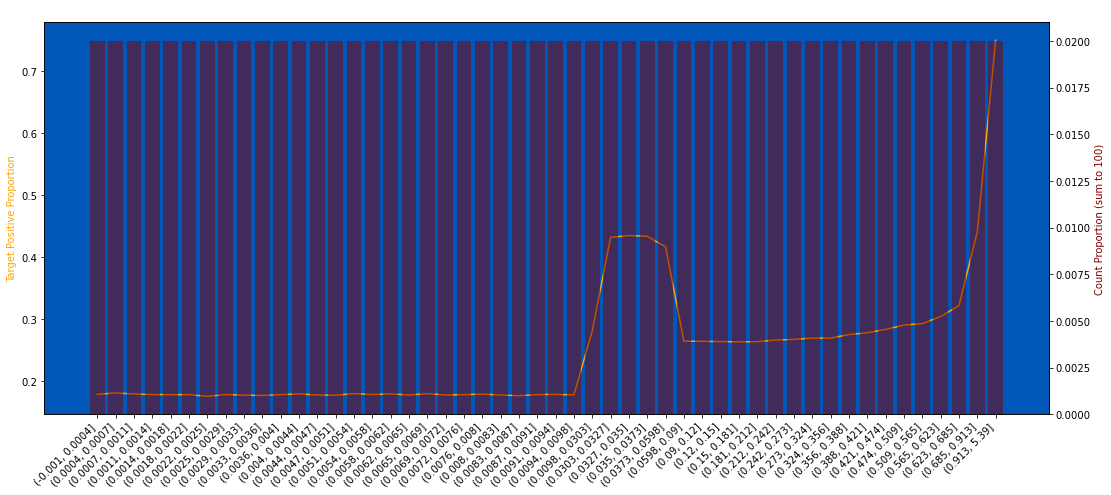

In [36]:
plot_target_check(train, "D_39", q=50, use_raw_bin=True, nunique_thr=1000)

In [37]:
%%time
df_list = round_dfs(df_list, col="D_39", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 450 ms, sys: 1.55 s, total: 2 s
Wall time: 2.95 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


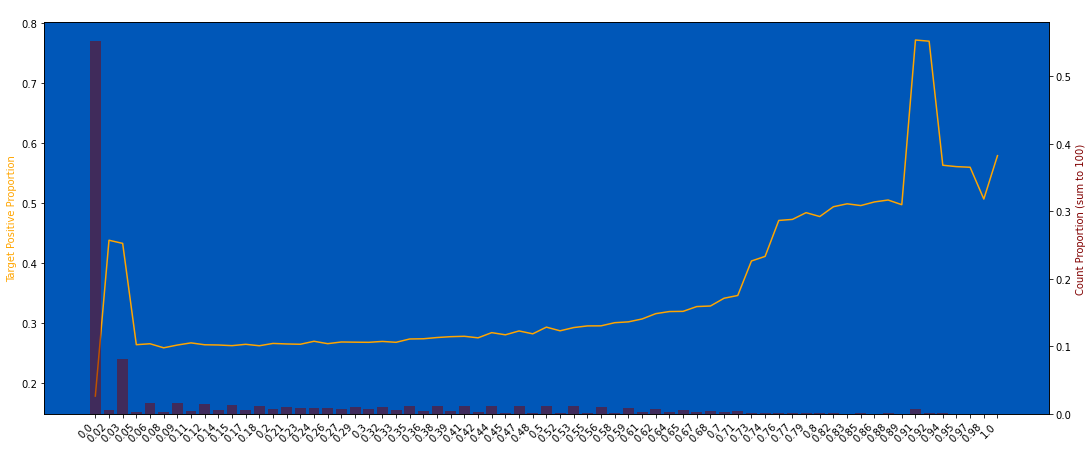

In [38]:
plot_target_check(train, "D_39", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

In [39]:
%%time
for df in df_list:
    df["D_39"] = (df["D_39"] / 0.03).apply(np.ceil)
    df["D_39"] = df["D_39"].parallel_apply(lambda x: manual_stack(x, start=92, stack_interval=10, denom=1))

CPU times: user 274 ms, sys: 1.01 s, total: 1.28 s
Wall time: 1.69 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


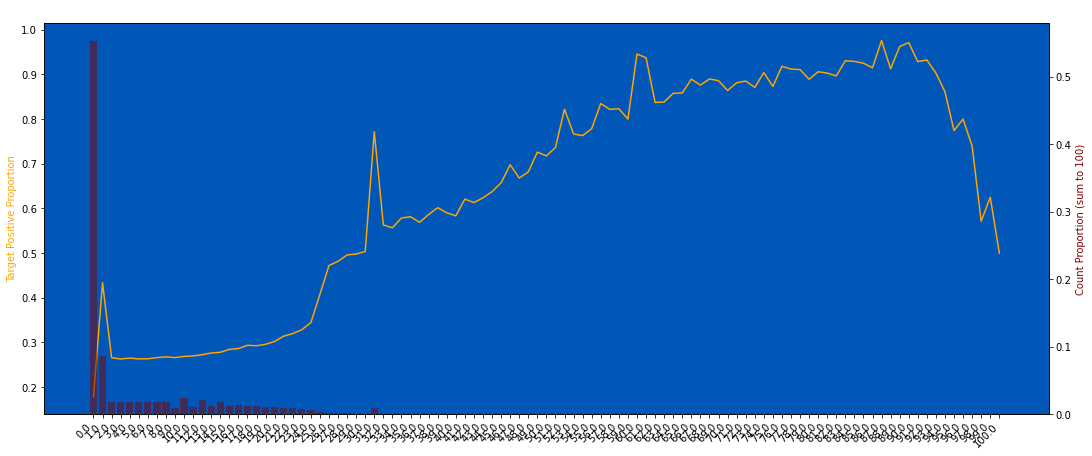

In [40]:
plot_target_check(train, "D_39", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


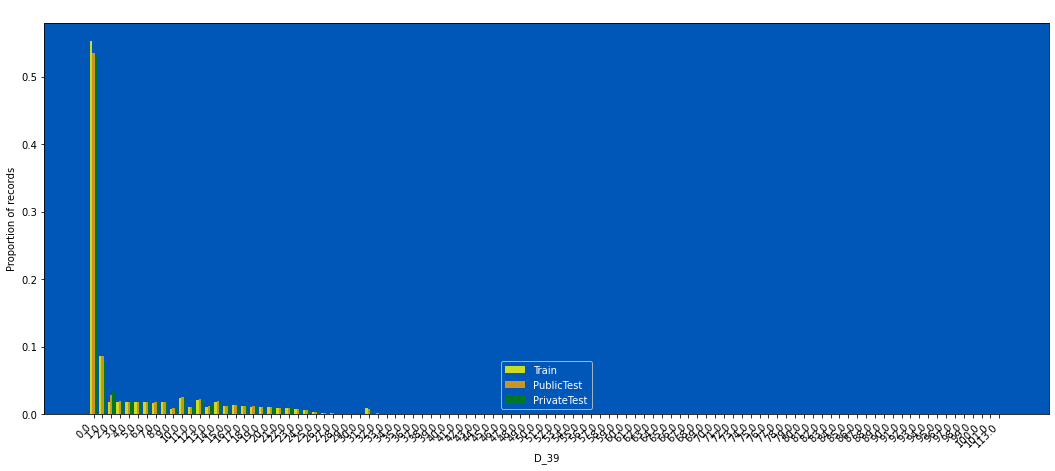

In [41]:
plot_train_test_distribution(df_list, "D_39", nunique_thr=1000, without_drop_tail=True)

**Train Test Skew**
- Moderate

### D_41

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


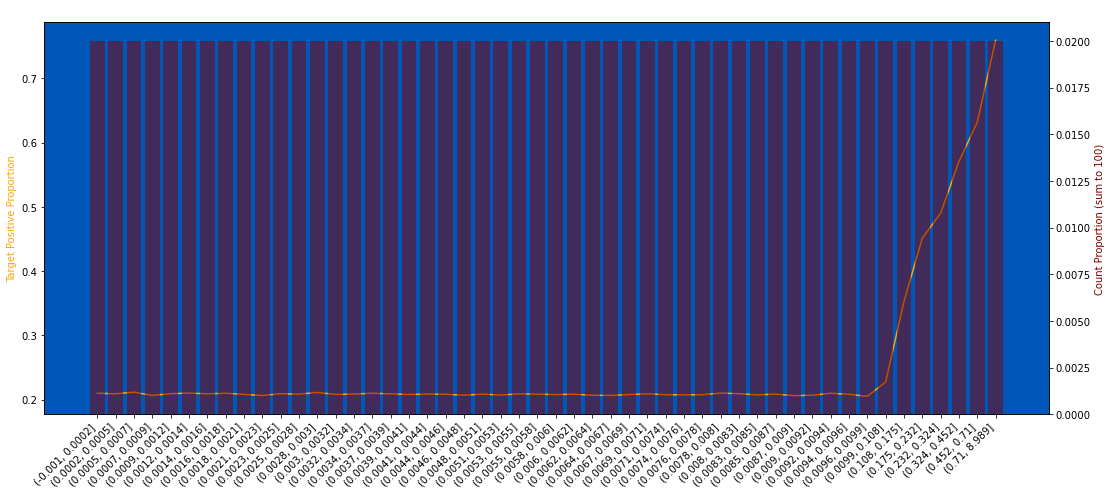

In [42]:
plot_target_check(train, "D_41", q=50, use_raw_bin=True)

In [43]:
%%time
df_list = round_dfs(df_list, col="D_41", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 438 ms, sys: 2.14 s, total: 2.58 s
Wall time: 4.67 s


In [44]:
# %%time
# for df in df_list:
#     df["D_41_"] = df["D_41"].parallel_apply(lambda x: manual_stack(x, start=0.04, stack_interval=0.05, denom=100))

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


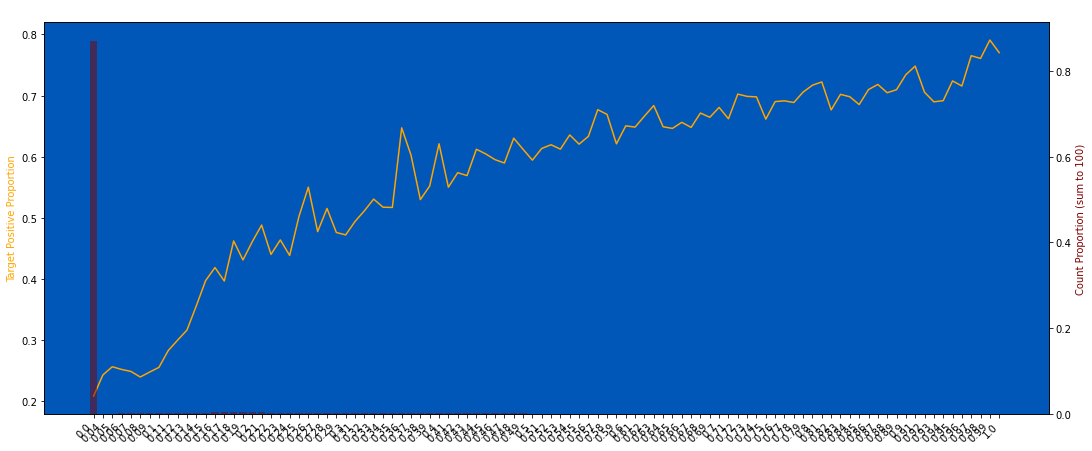

In [45]:
plot_target_check(train, "D_41", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=False)

Bottom 1% and Top 1% are dropped from this chart


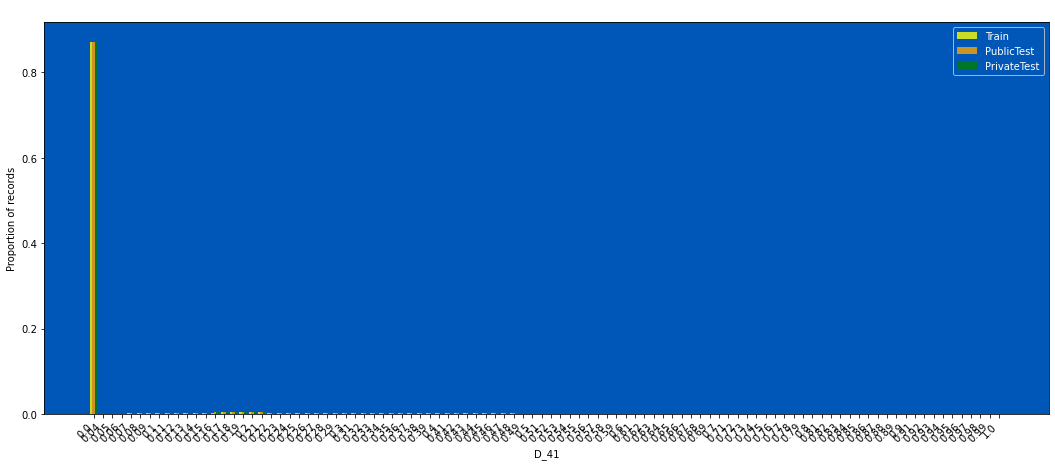

In [46]:
plot_train_test_distribution(df_list, "D_41", nunique_thr=1000)

### D_42

4740137 null count, 0.857 null proportion
0.2075 of the targets have label = 1


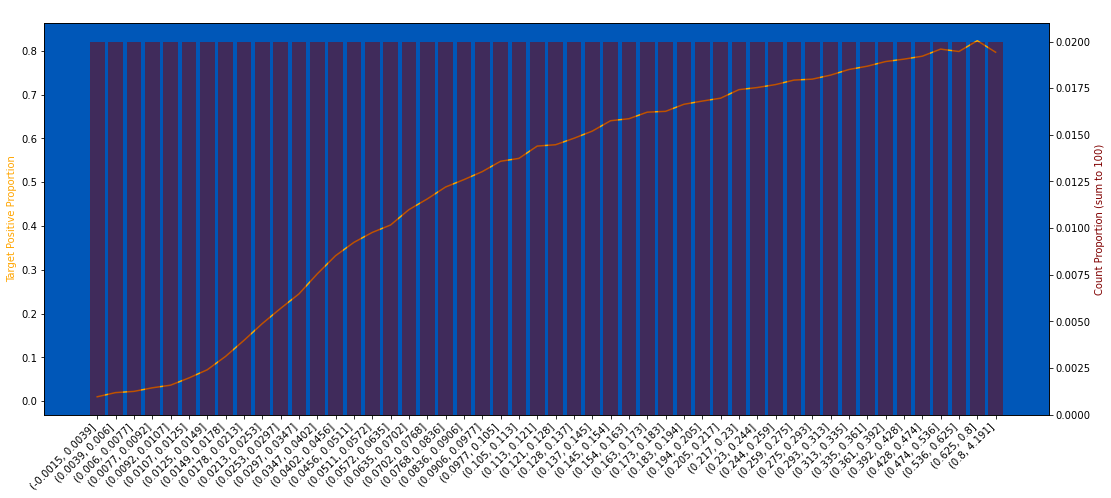

In [48]:
plot_target_check(train, "D_42", q=50, use_raw_bin=True)

In [49]:
%%time
df_list = round_dfs(df_list, col="D_42", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 364 ms, sys: 1.72 s, total: 2.09 s
Wall time: 3.36 s


4740137 null count, 0.857 null proportion
0.2075 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


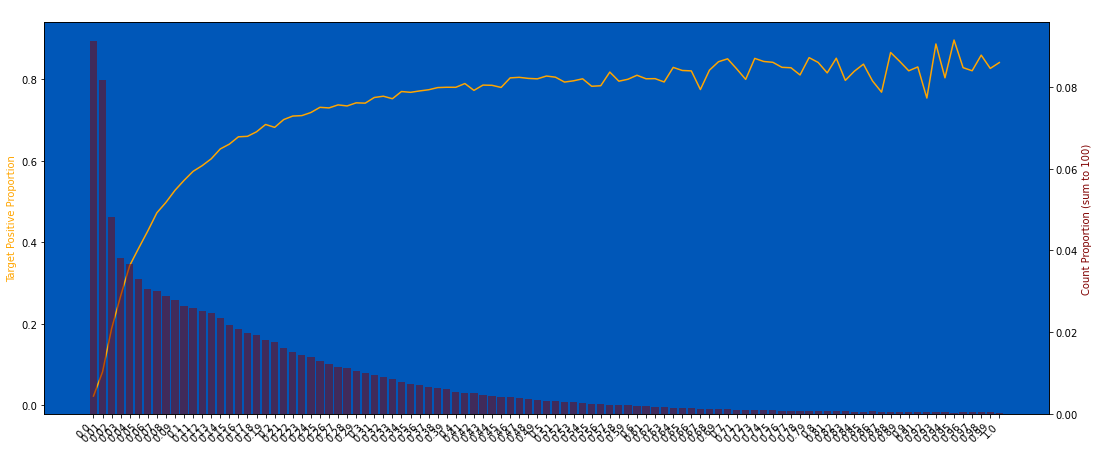

In [50]:
plot_target_check(train, "D_42", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


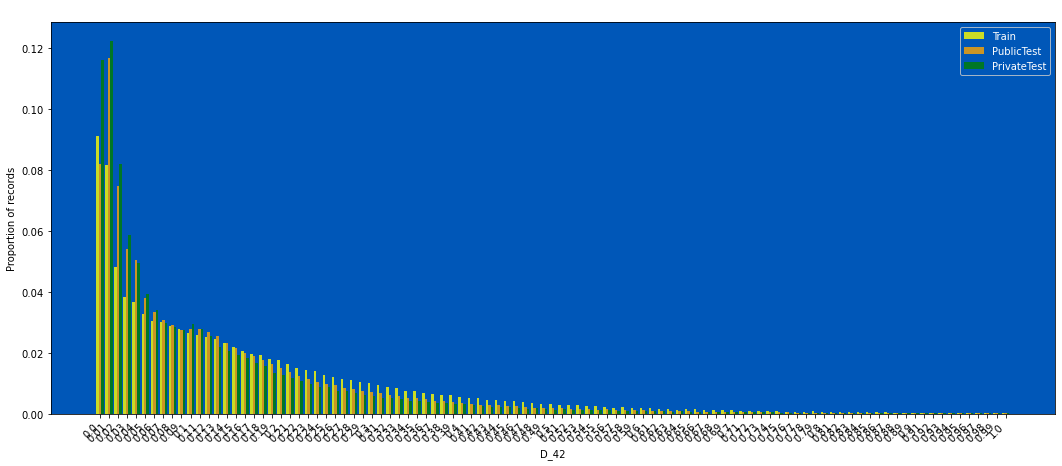

In [51]:
plot_train_test_distribution(df_list, "D_42", nunique_thr=1000)

**Train Test Drift: Heavy**

### D_43

1658396 null count, 0.300 null proportion
0.1673 of the targets have label = 1


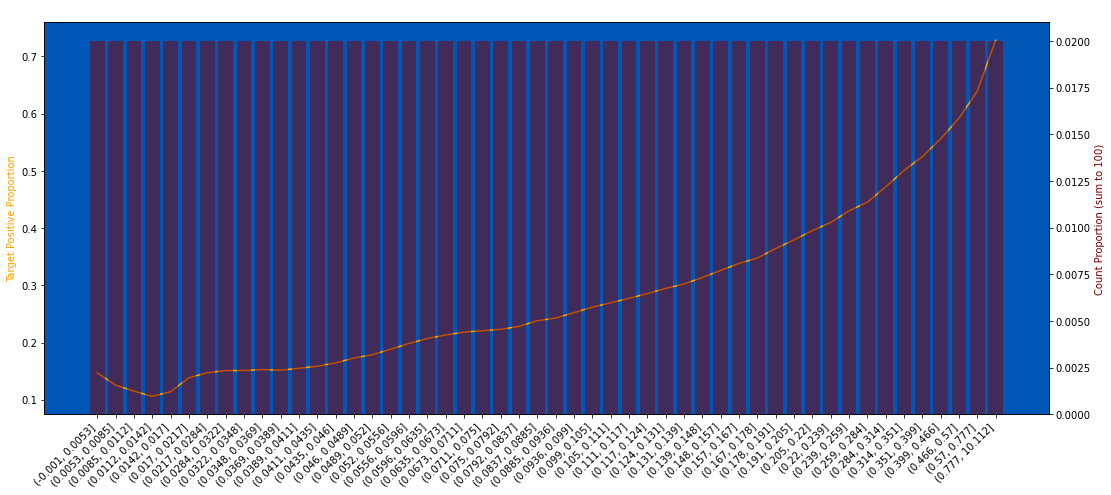

In [52]:
plot_target_check(train, "D_43", q=50, use_raw_bin=True)

In [55]:
%%time
df_list = round_dfs(df_list, col="D_43", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 202 ms, sys: 822 ms, total: 1.02 s
Wall time: 2.01 s


1658396 null count, 0.300 null proportion
0.1673 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


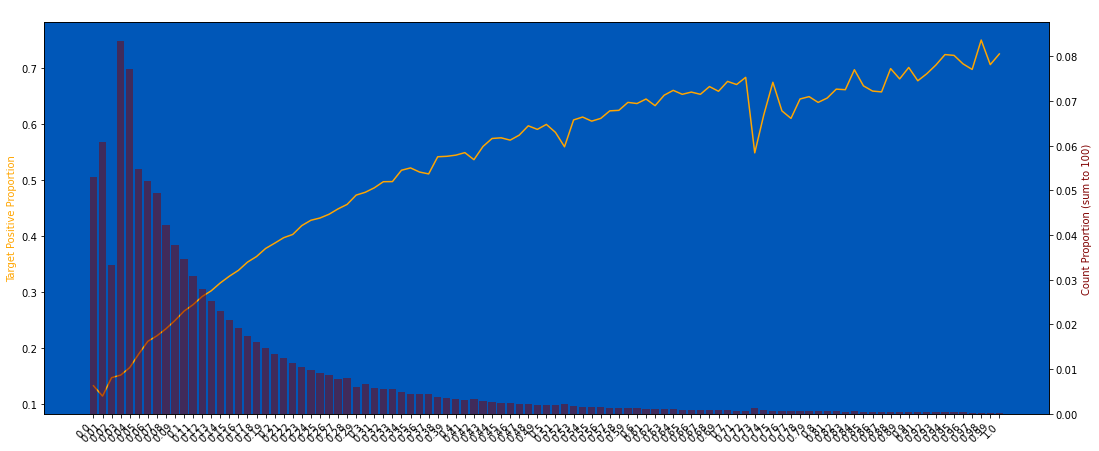

In [56]:
plot_target_check(train, "D_43", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


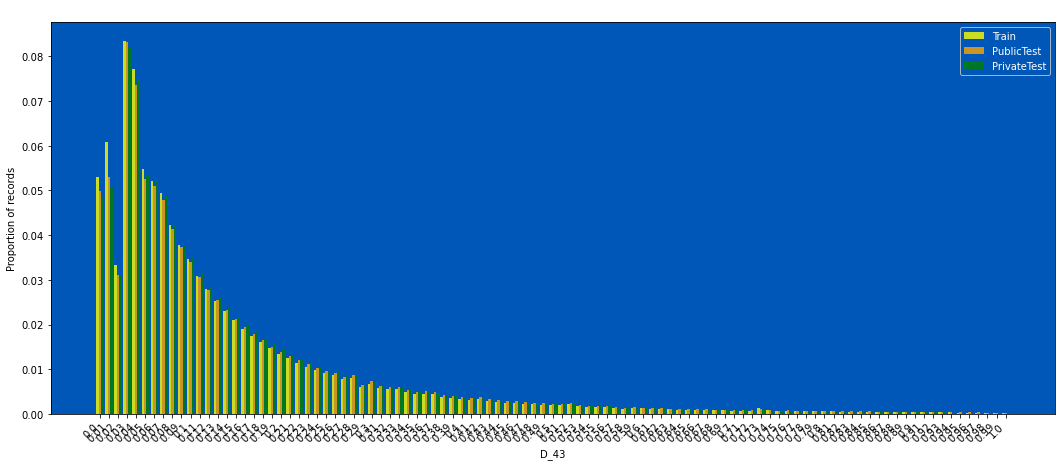

In [57]:
plot_train_test_distribution(df_list, "D_43", nunique_thr=1000)

**Train Test Drift: Moderate**

### D_44

274319 null count, 0.050 null proportion
0.2406 of the targets have label = 1


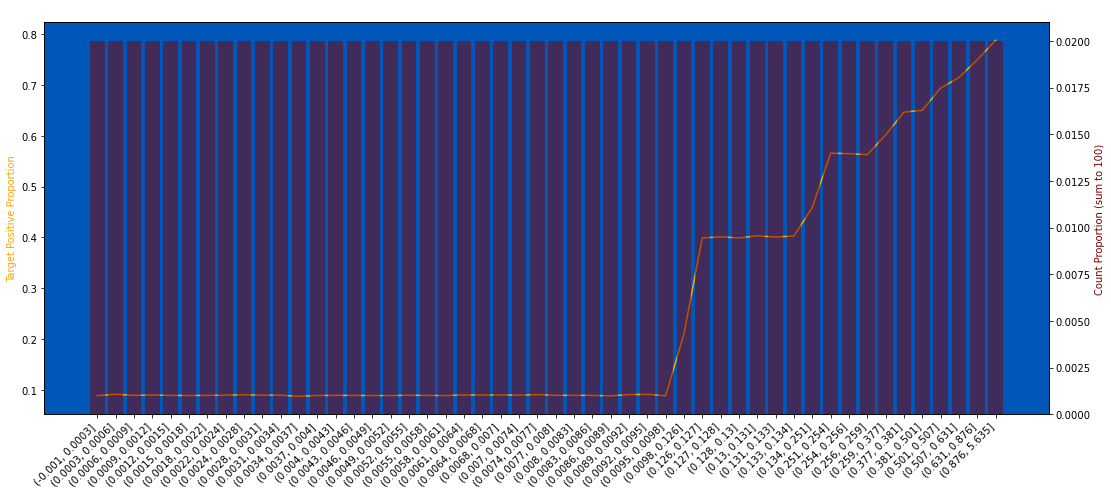

In [58]:
plot_target_check(train, "D_44", q=50, use_raw_bin=True, nunique_thr=1000)

In [59]:
%%time
df_list = round_dfs(df_list, col="D_44", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 405 ms, sys: 1.95 s, total: 2.36 s
Wall time: 3.88 s


In [67]:
for df in df_list:
    df["D_44"] = (df["D_44"] * 8).round(0)

274319 null count, 0.050 null proportion
0.2406 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


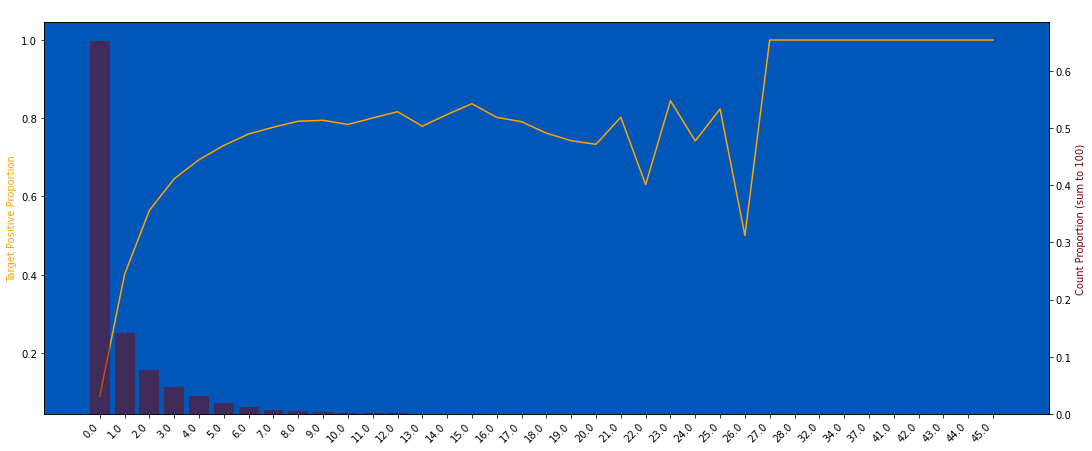

In [68]:
plot_target_check(train, "D_44", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


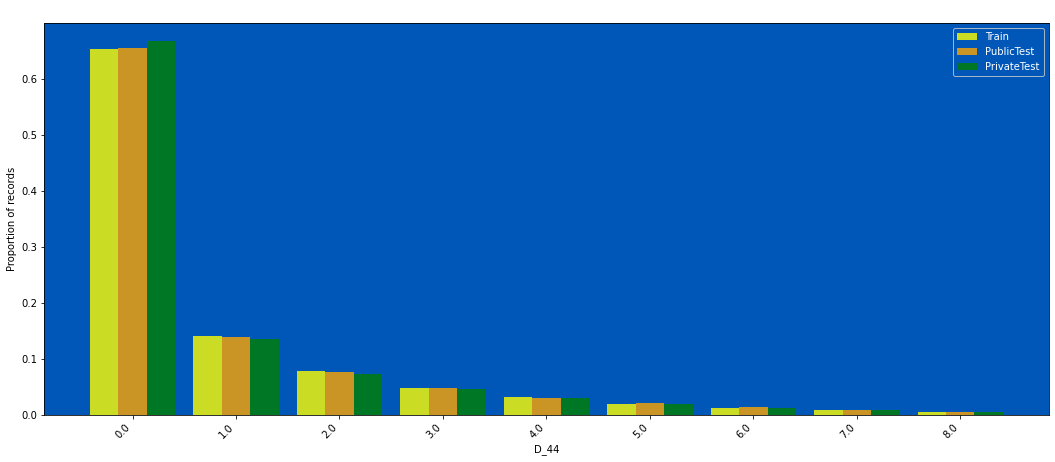

In [69]:
plot_train_test_distribution(df_list, "D_44", nunique_thr=1000)

### D_45

2017 null count, 0.000 null proportion
0.3560 of the targets have label = 1


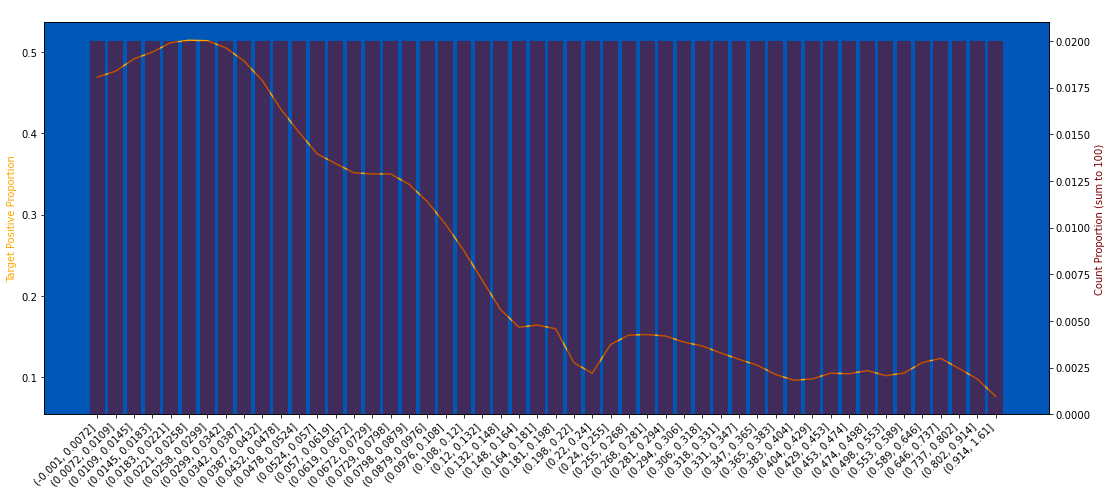

In [70]:
plot_target_check(train, "D_45", q=50, use_raw_bin=True)

In [71]:
%%time
df_list = round_dfs(df_list, col="D_45", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 412 ms, sys: 2.19 s, total: 2.61 s
Wall time: 4.23 s


2017 null count, 0.000 null proportion
0.3560 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


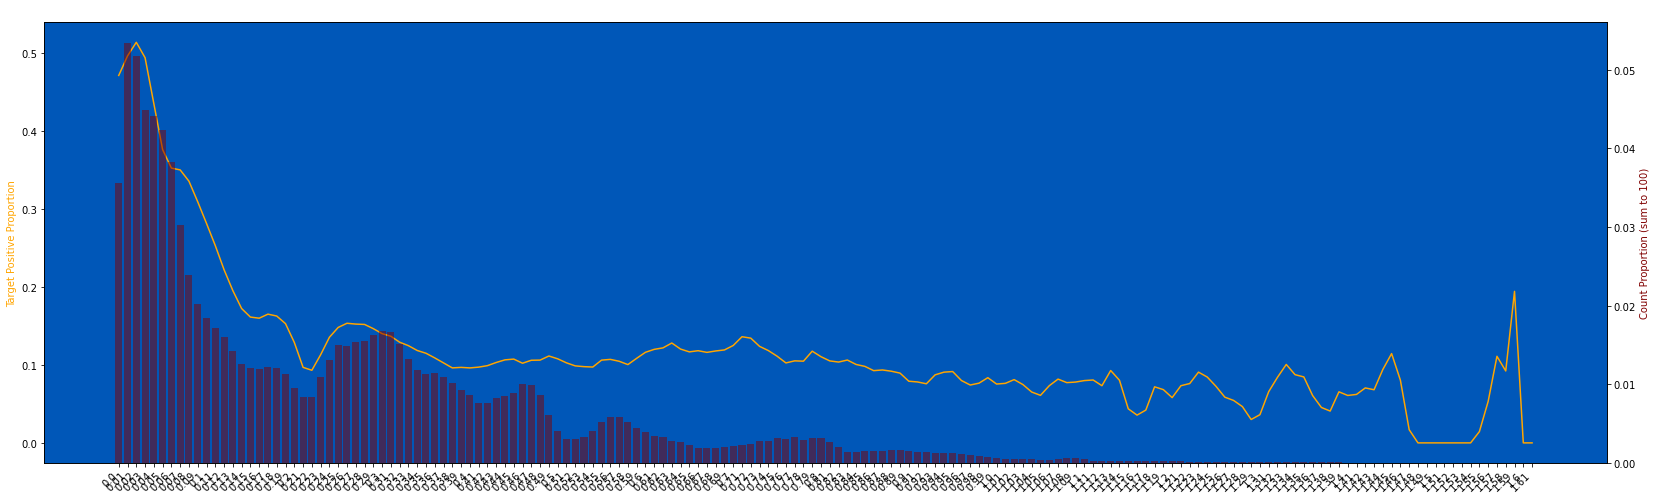

In [78]:
plot_target_check(train, "D_45", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=True, figsize=(28, 9))

Bottom 1% and Top 1% are dropped from this chart


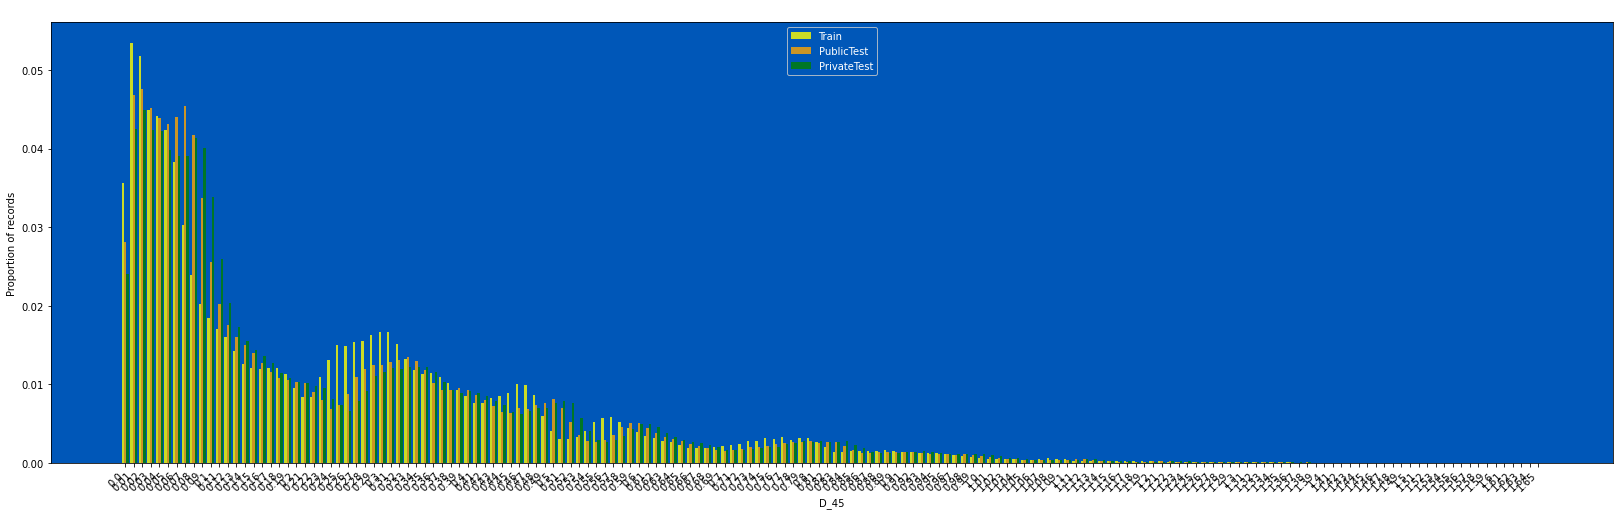

In [81]:
plot_train_test_distribution(df_list, "D_45", nunique_thr=8000, without_drop_tail=True, figsize=(28, 9))

**Train Test Drift: Heavy**

### D_46

1211699 null count, 0.219 null proportion
0.1940 of the targets have label = 1


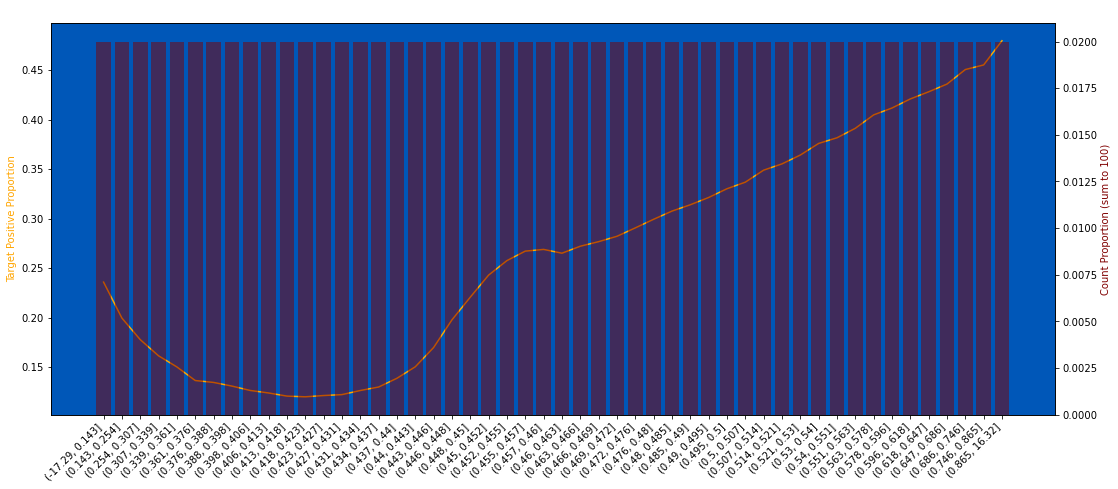

In [82]:
plot_target_check(train, "D_46", q=50, use_raw_bin=True)

In [83]:
%%time
df_list = round_dfs(df_list, col="D_46", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 385 ms, sys: 1.94 s, total: 2.33 s
Wall time: 4 s


1211699 null count, 0.219 null proportion
0.1940 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


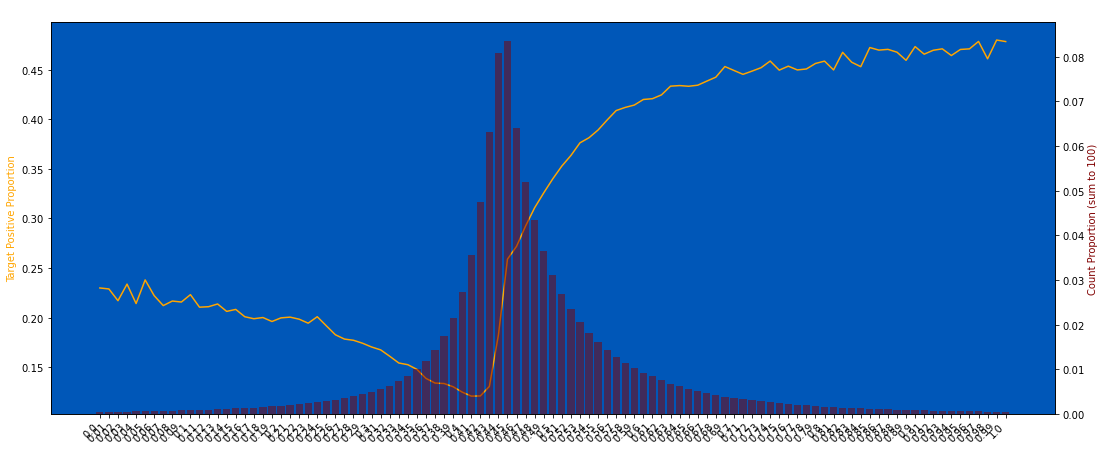

In [84]:
d46_summary = plot_target_check(train, "D_46", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, return_df=True)

- Similar pattern as P_3, can try feature crossing between them??

Bottom 1% and Top 1% are dropped from this chart


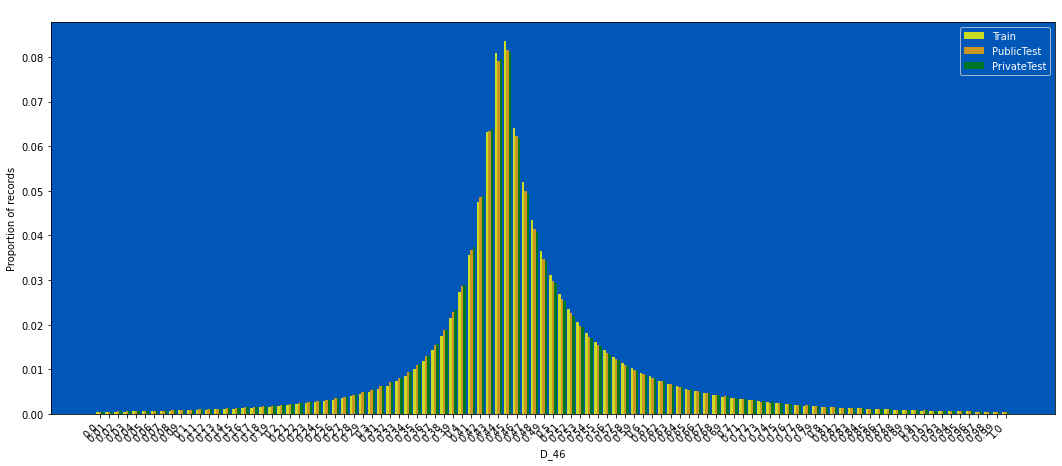

In [ ]:
plot_train_test_distribution(df_list, "D_46", nunique_thr=8000)

### D_47

0 null count, 0.000 null proportion
nan of the targets have label = 1


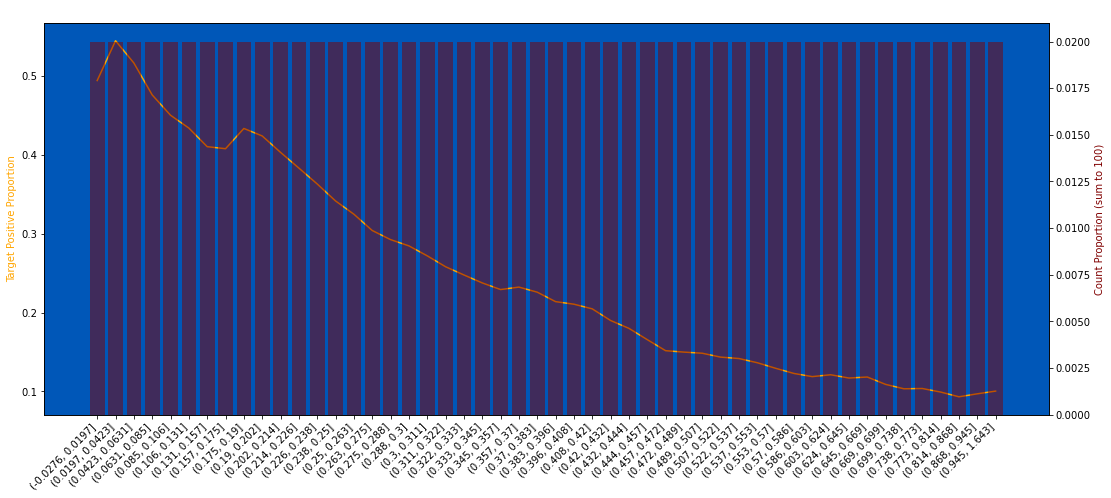

In [95]:
plot_target_check(train, "D_47", q=50, use_raw_bin=True)

In [96]:
%%time
df_list = round_dfs(df_list, col="D_47", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 393 ms, sys: 1.73 s, total: 2.12 s
Wall time: 3.09 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


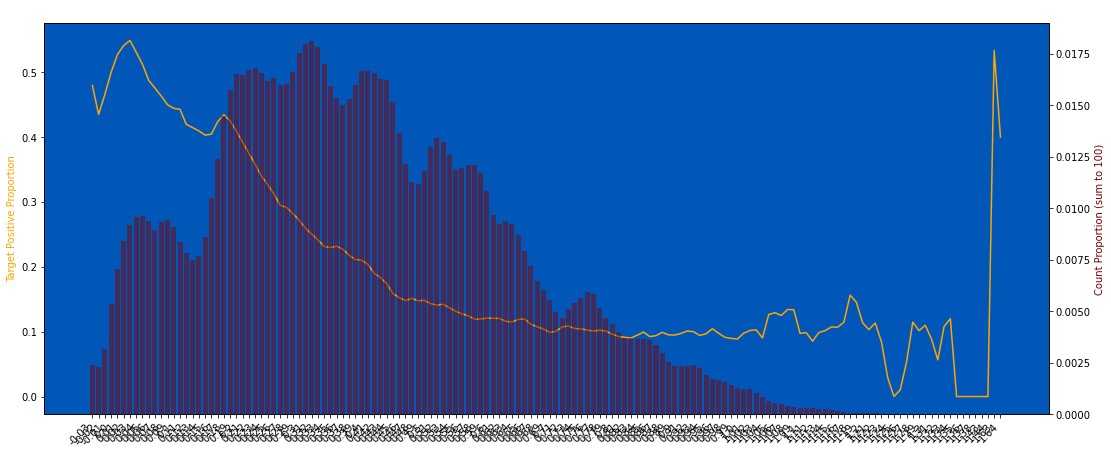

In [98]:
plot_target_check(train, "D_47", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


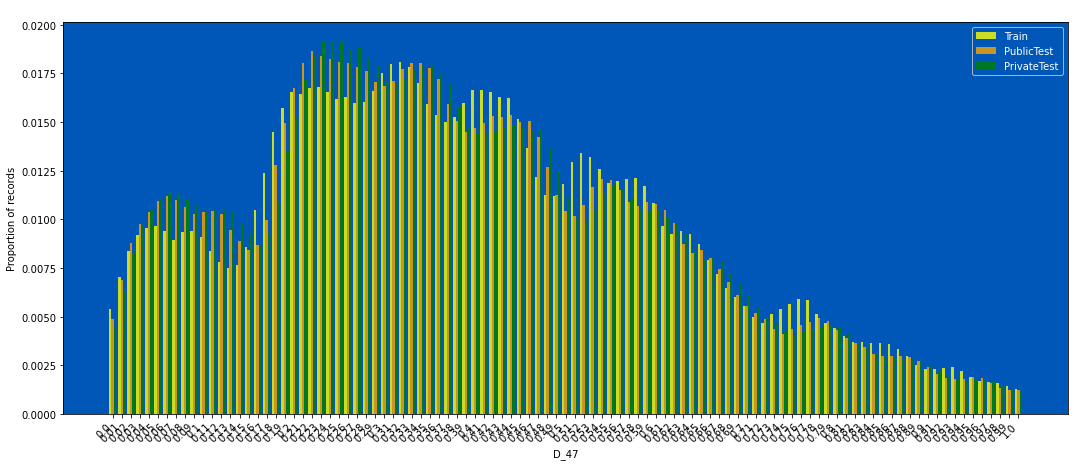

In [99]:
plot_train_test_distribution(df_list, "D_47", nunique_thr=8000)

**Train Test Drift: Heavy**

### D_48

718725 null count, 0.130 null proportion
0.1221 of the targets have label = 1


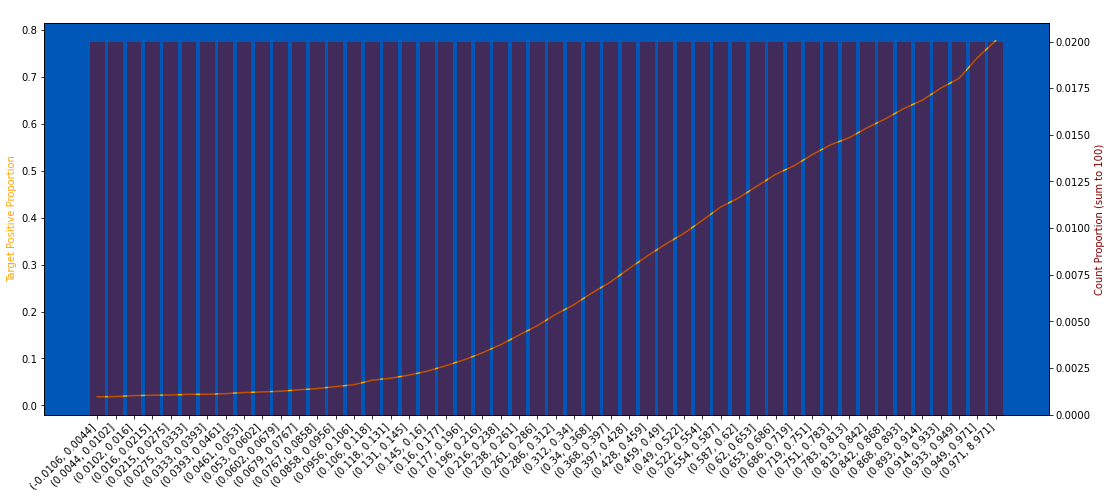

In [100]:
plot_target_check(train, "D_48", q=50, use_raw_bin=True)

In [101]:
%%time
df_list = round_dfs(df_list, col="D_48", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 370 ms, sys: 1.86 s, total: 2.23 s
Wall time: 3.67 s


718725 null count, 0.130 null proportion
0.1221 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


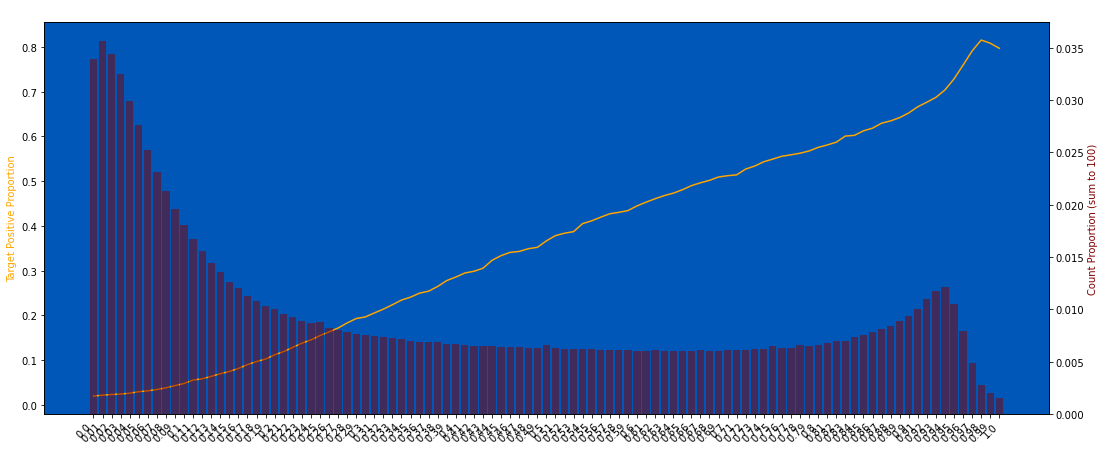

In [105]:
plot_target_check(train, "D_48", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


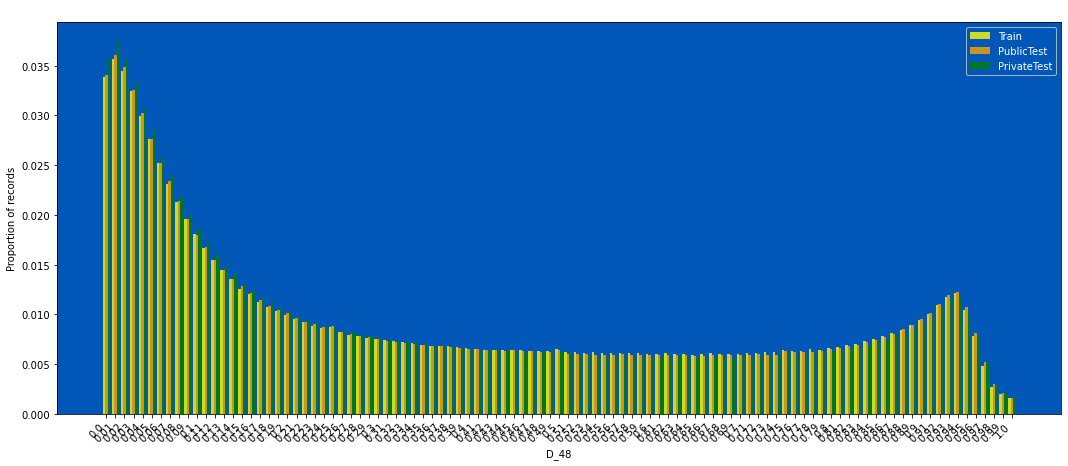

In [106]:
plot_train_test_distribution(df_list, "D_48", nunique_thr=8000)

### D_49

4985917 null count, 0.901 null proportion
0.2162 of the targets have label = 1


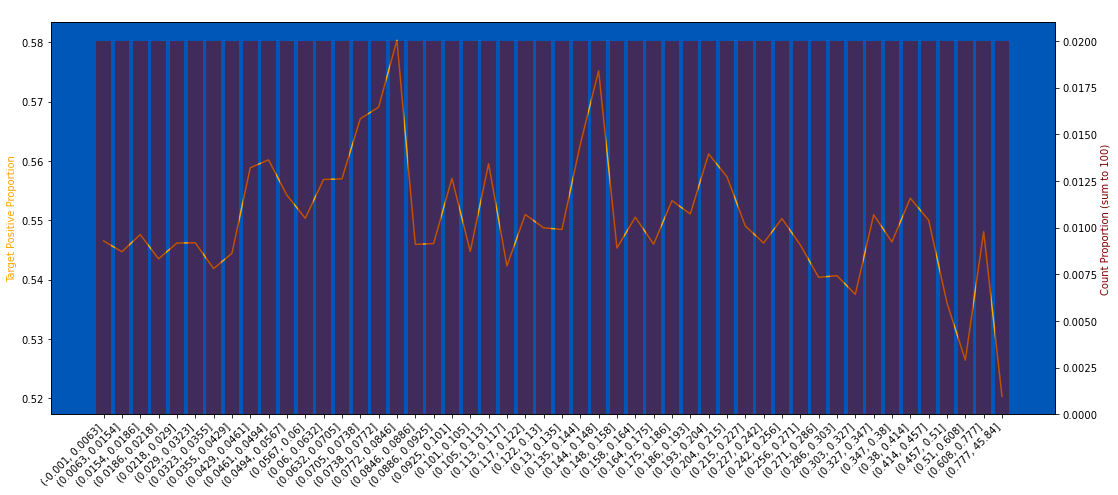

In [107]:
plot_target_check(train, "D_49", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

In [108]:
%%time
df_list = round_dfs(df_list, col="D_49", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 362 ms, sys: 1.83 s, total: 2.19 s
Wall time: 3.52 s


4985917 null count, 0.901 null proportion
0.2162 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


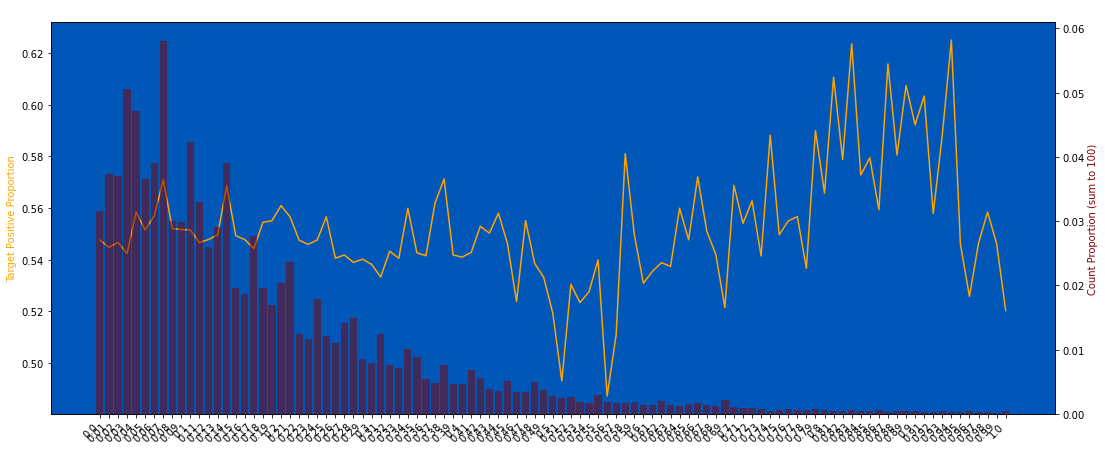

In [109]:
plot_target_check(train, "D_49", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


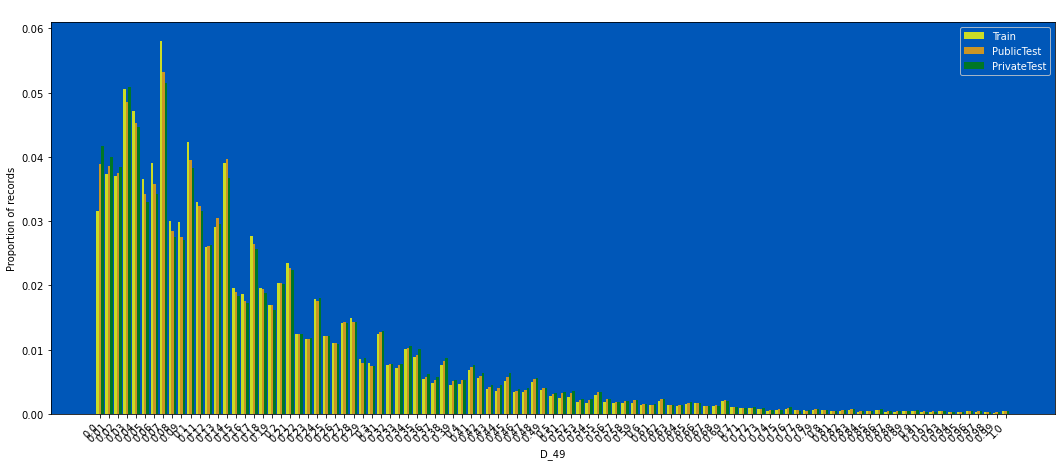

In [110]:
plot_train_test_distribution(df_list, "D_49", nunique_thr=1000)

**Train Test Drift: Moderate**

### D_50

3142402 null count, 0.568 null proportion
0.3005 of the targets have label = 1


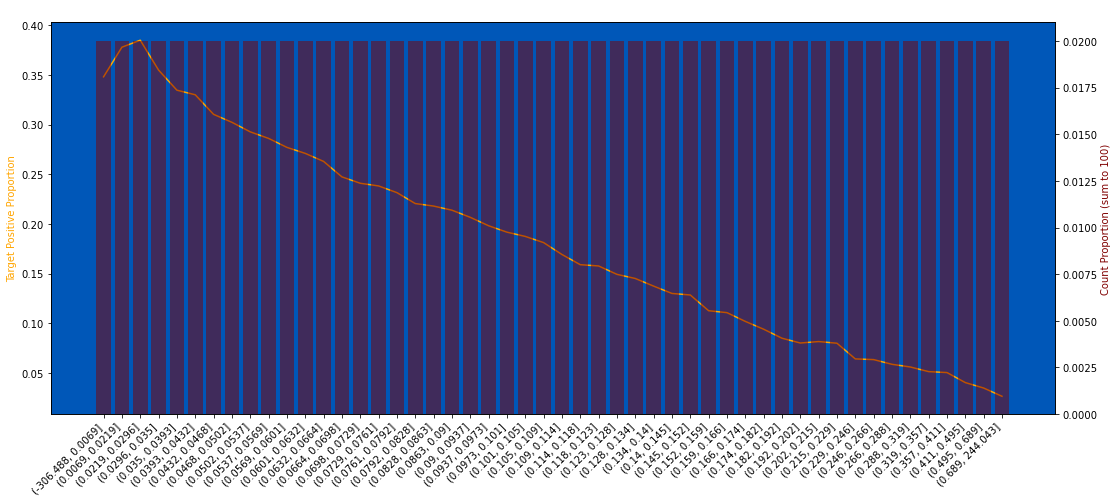

In [111]:
plot_target_check(train, "D_50", q=50, use_raw_bin=True)

In [112]:
%%time
df_list = round_dfs(df_list, col="D_50", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 352 ms, sys: 1.8 s, total: 2.15 s
Wall time: 3.56 s


3142402 null count, 0.568 null proportion
0.3005 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


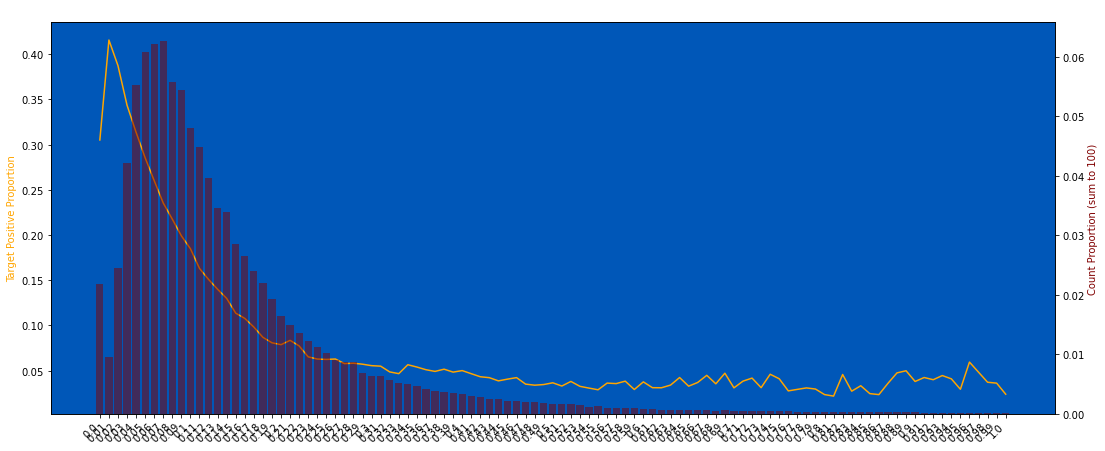

In [113]:
plot_target_check(train, "D_50", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


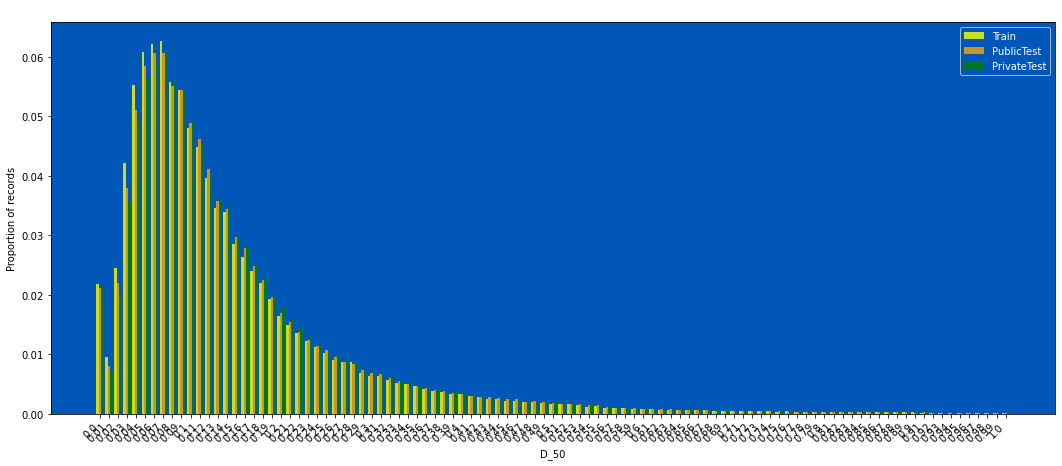

In [114]:
plot_train_test_distribution(df_list, "D_50", nunique_thr=10000)

### D_51

0 null count, 0.000 null proportion
nan of the targets have label = 1


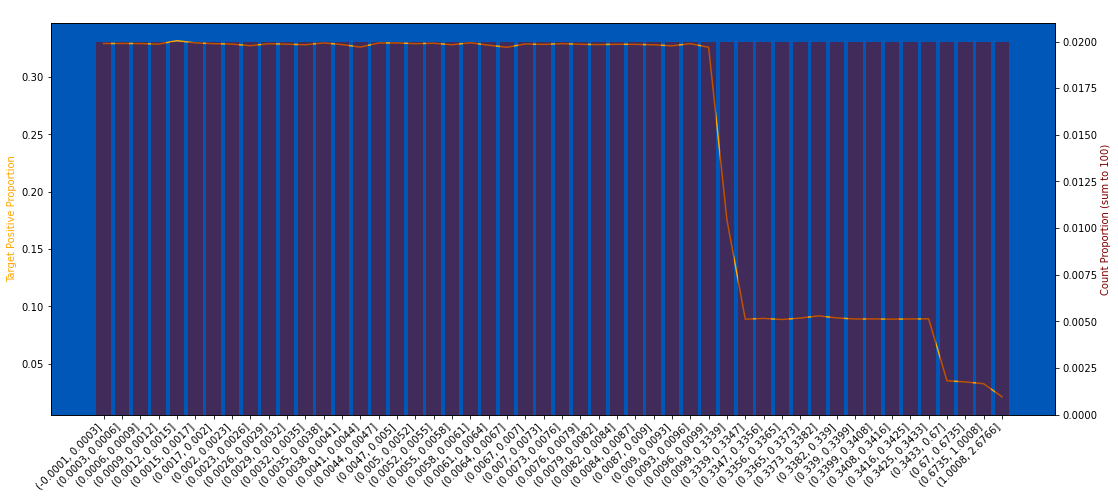

In [115]:
plot_target_check(train, "D_51", q=50, use_raw_bin=True, nunique_thr=10000)

In [116]:
%%time
df_list = round_dfs(df_list, col="D_51", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 378 ms, sys: 1.73 s, total: 2.1 s
Wall time: 3.49 s


In [119]:
for df in df_list:
    df["D_51_"] = (df["D_51"] * 3).round(0)

Bottom 1% and Top 1% are dropped from this chart


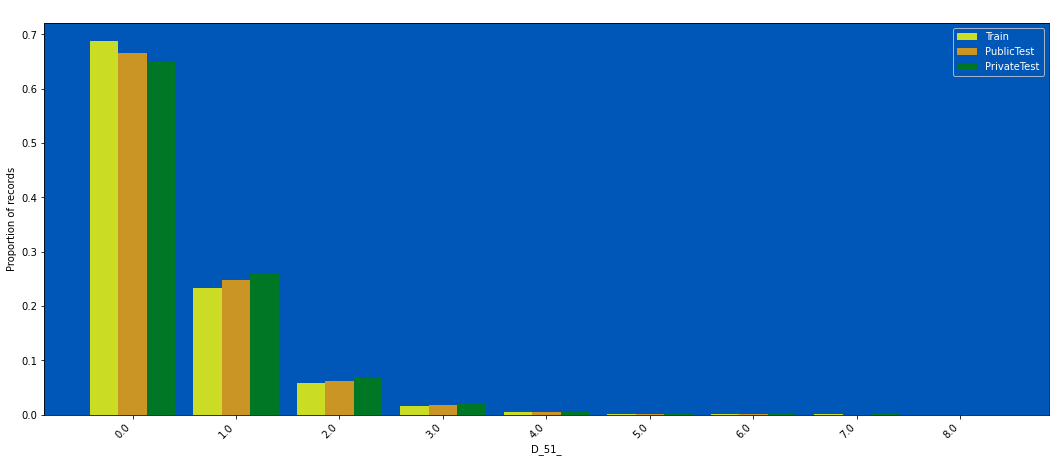

In [120]:
plot_train_test_distribution(df_list, "D_51_", nunique_thr=1000, without_drop_tail=True)

### D_52

29563 null count, 0.005 null proportion
0.3523 of the targets have label = 1


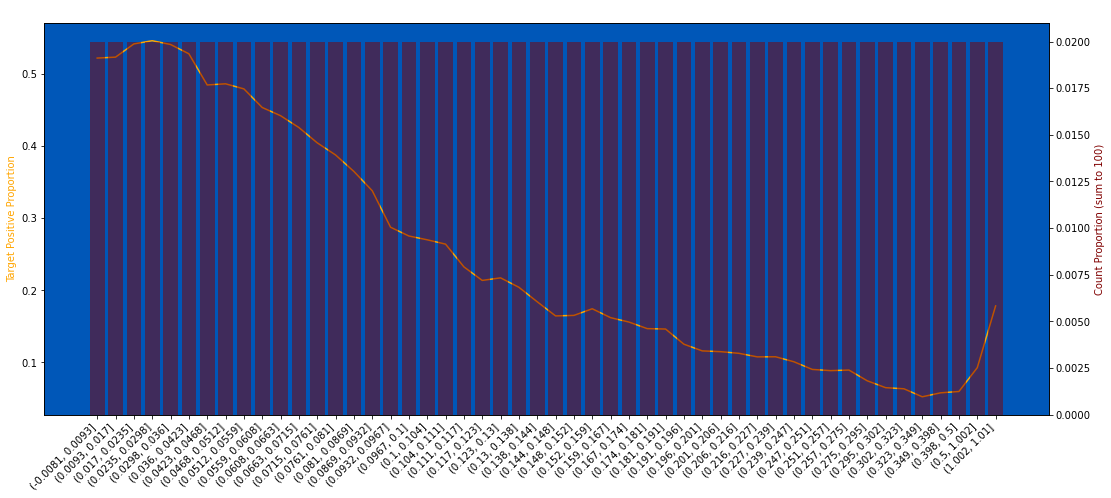

In [121]:
plot_target_check(train, "D_52", q=50, use_raw_bin=True)

In [122]:
%%time
df_list = round_dfs(df_list, col="D_52", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 372 ms, sys: 1.71 s, total: 2.09 s
Wall time: 3.07 s


29563 null count, 0.005 null proportion
0.3523 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


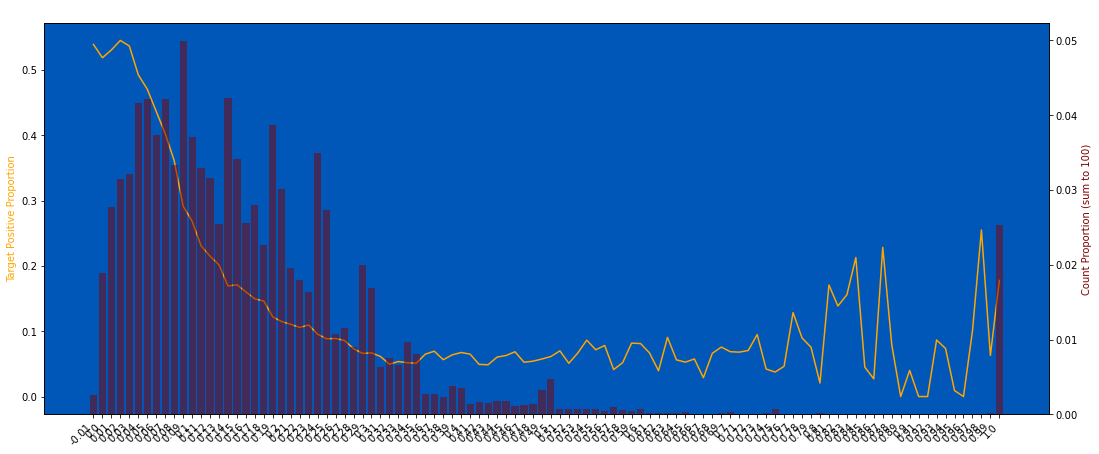

In [125]:
plot_target_check(train, "D_52", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


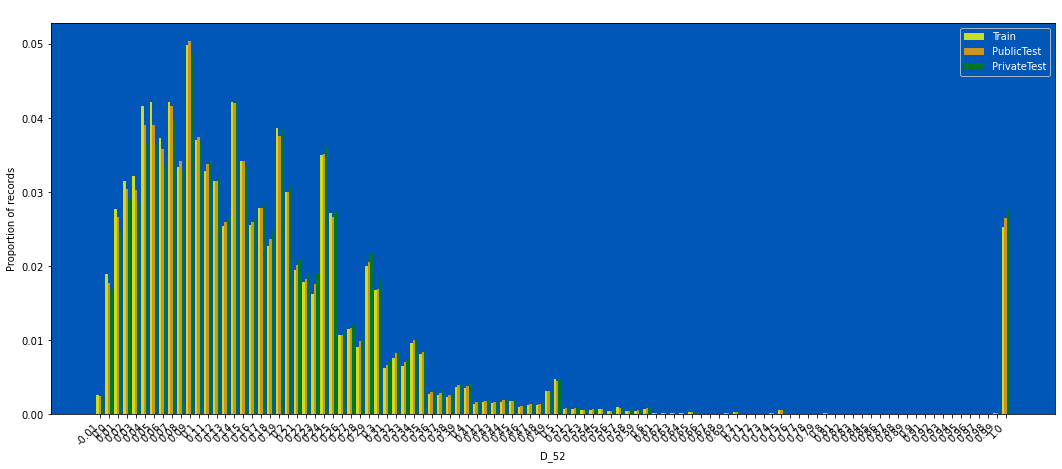

In [126]:
plot_train_test_distribution(df_list, "D_52", nunique_thr=1000, without_drop_tail=True)

**Train Test Drift: Moderate**

### D_53

4084585 null count, 0.738 null proportion
0.1836 of the targets have label = 1


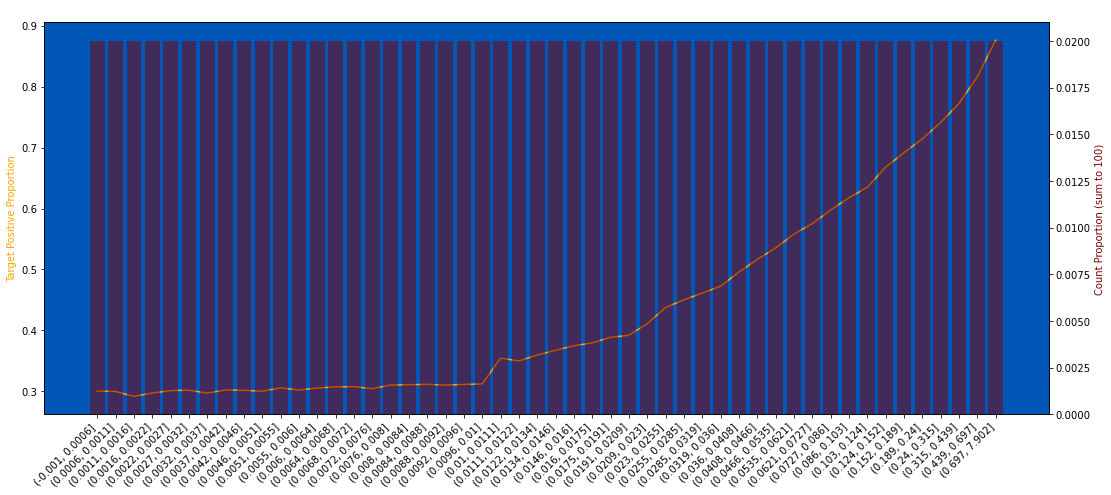

In [127]:
plot_target_check(train, "D_53", q=50, use_raw_bin=True)

In [128]:
%%time
df_list = round_dfs(df_list, col="D_53", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 405 ms, sys: 1.95 s, total: 2.36 s
Wall time: 4.19 s


4084585 null count, 0.738 null proportion
0.1836 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


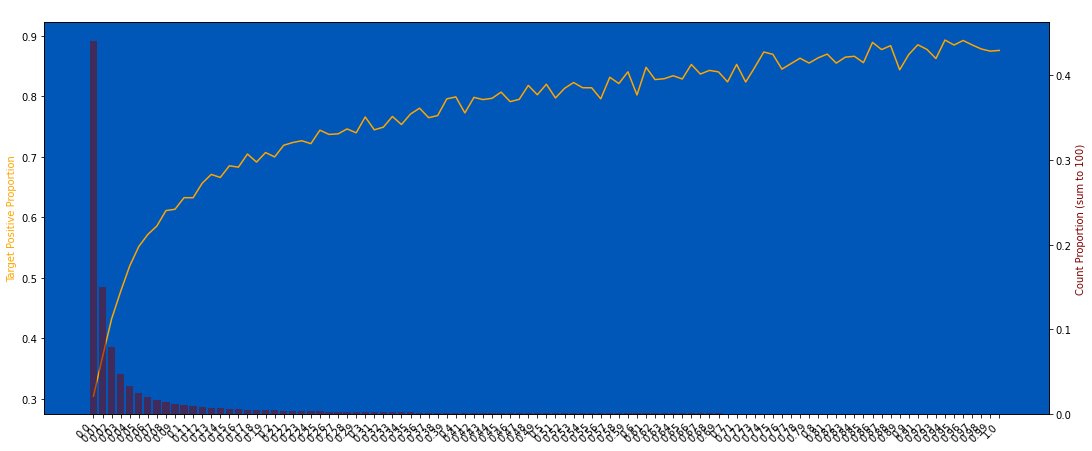

In [131]:
plot_target_check(train, "D_53", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


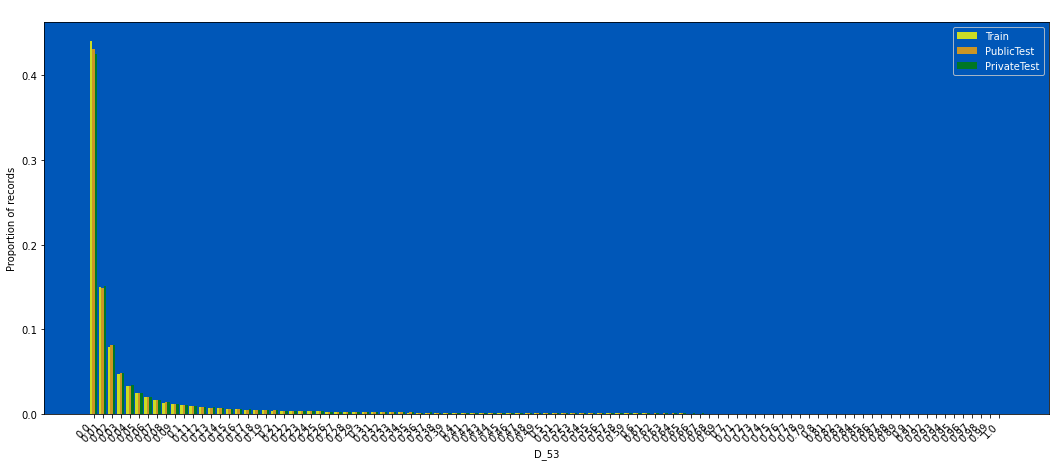

In [132]:
plot_train_test_distribution(df_list, "D_53", nunique_thr=1000)

### D_54

2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1


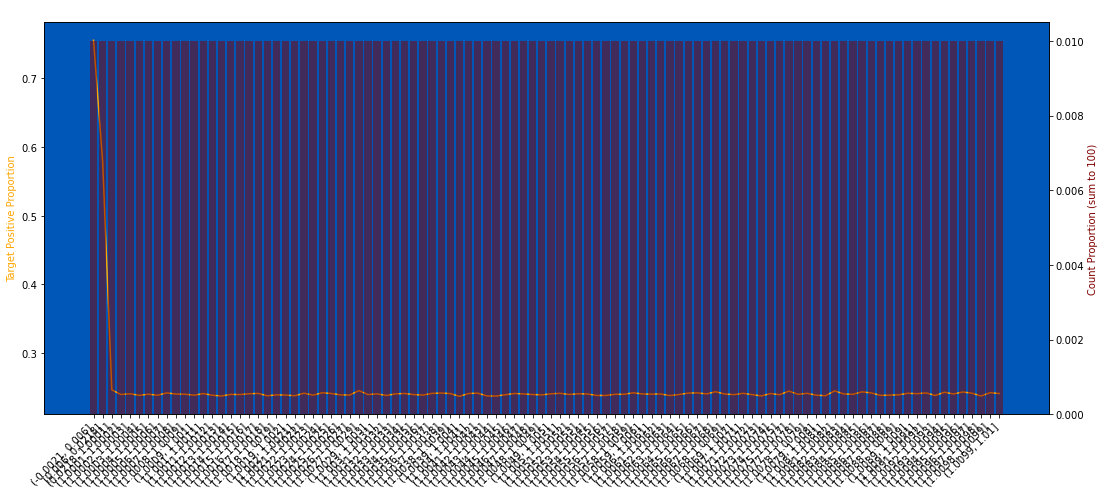

In [133]:
plot_target_check(train, "D_54", q=100, use_raw_bin=True)

In [148]:
for df in df_list:
    df["D_54"] = df["D_54"].round(0)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 257 ms, sys: 1.25 s, total: 1.5 s
Wall time: 2.74 s


2016 null count, 0.000 null proportion
0.3562 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


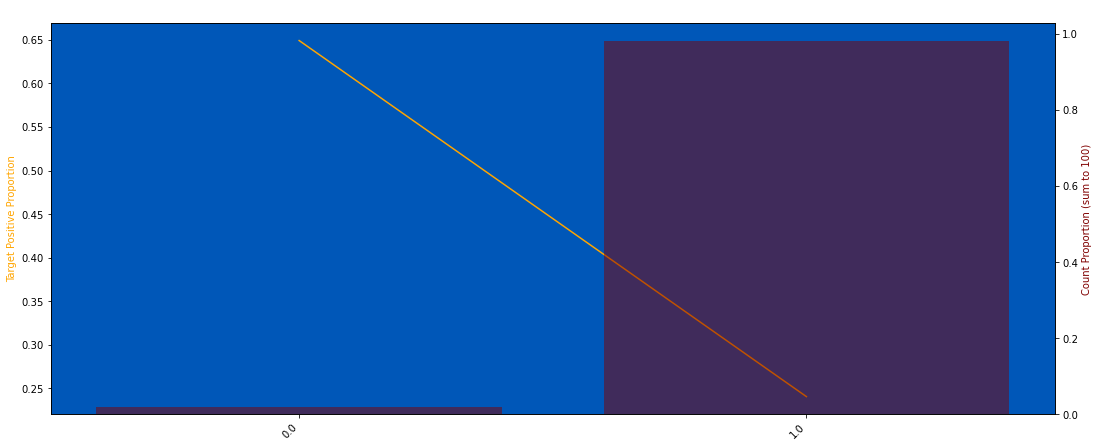

In [149]:
plot_target_check(train, "D_54", q=100, use_raw_bin=True, nunique_thr=4000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


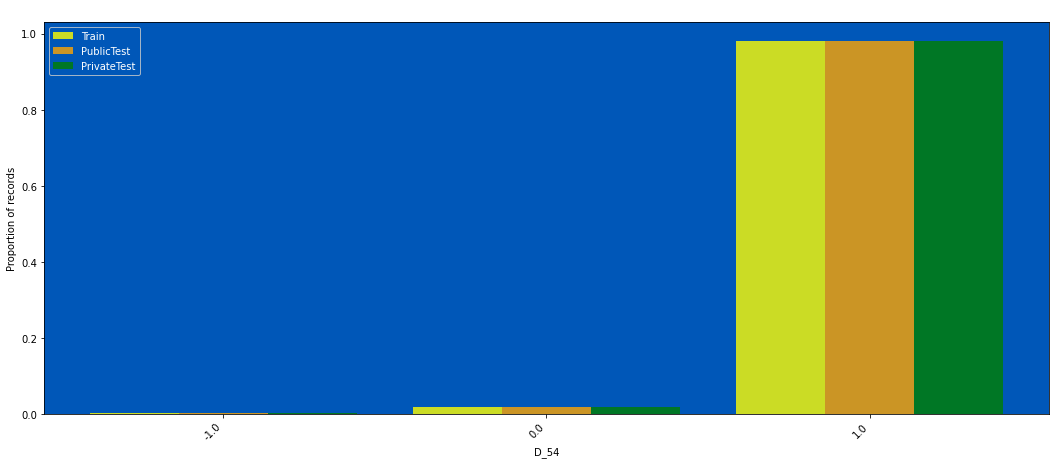

In [150]:
plot_train_test_distribution(df_list, "D_54", without_drop_tail=True)

### D_55

184803 null count, 0.033 null proportion
0.1759 of the targets have label = 1


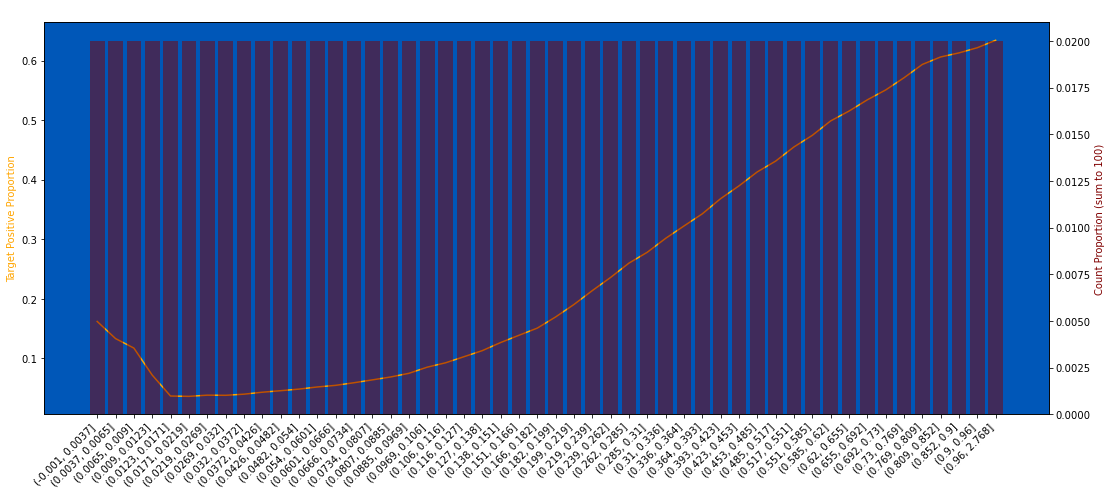

In [151]:
plot_target_check(train, "D_55", q=50, use_raw_bin=True)

In [152]:
%%time
df_list = round_dfs(df_list, col="D_55", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 412 ms, sys: 2.55 s, total: 2.97 s
Wall time: 5.28 s


184803 null count, 0.033 null proportion
0.1759 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


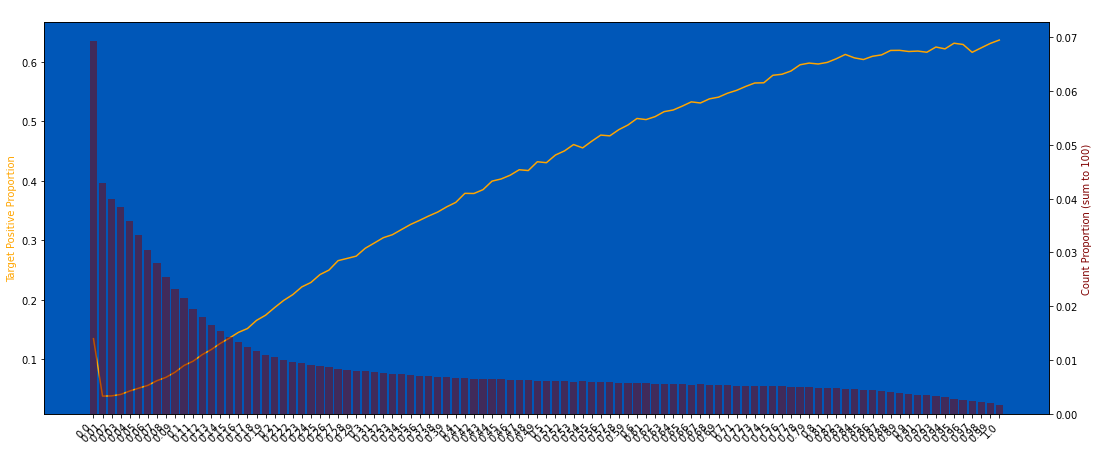

In [153]:
plot_target_check(train, "D_55", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


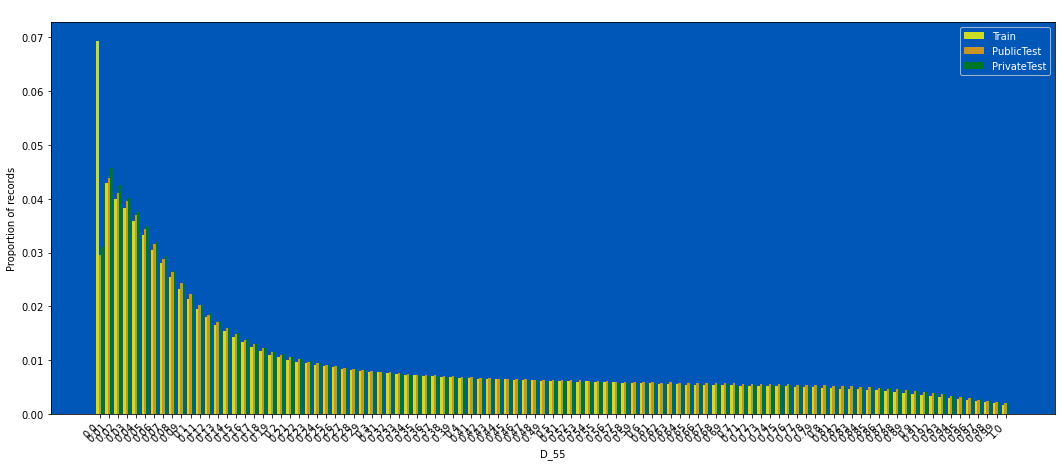

In [154]:
plot_train_test_distribution(df_list, "D_55", nunique_thr=1000)

**Train Test Drift: Heavy (on 0.0)**

### D_56

2990943 null count, 0.541 null proportion
0.3282 of the targets have label = 1


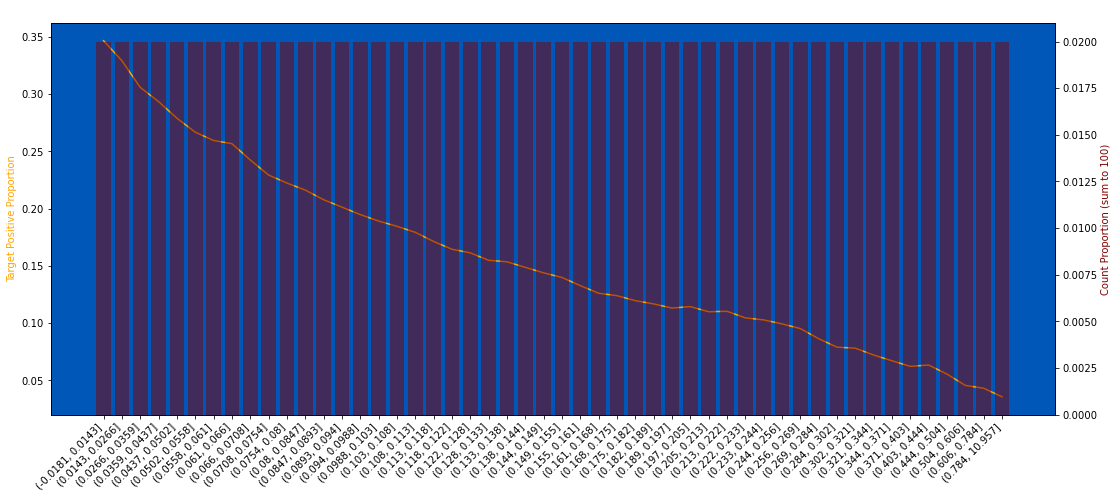

In [155]:
plot_target_check(train, "D_56", q=50, use_raw_bin=True)

In [156]:
%%time
df_list = round_dfs(df_list, col="D_56", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 391 ms, sys: 1.88 s, total: 2.27 s
Wall time: 3.97 s


2990943 null count, 0.541 null proportion
0.3282 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


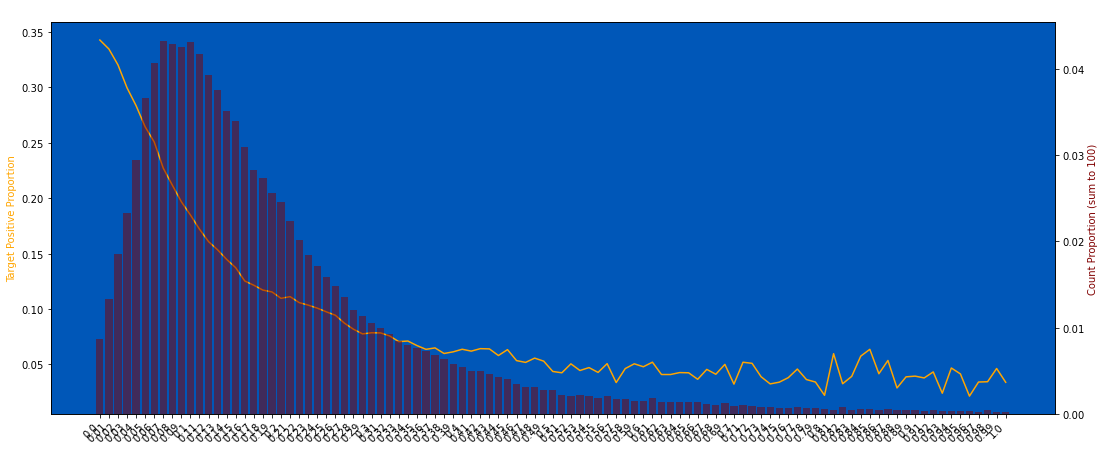

In [157]:
plot_target_check(train, "D_56", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


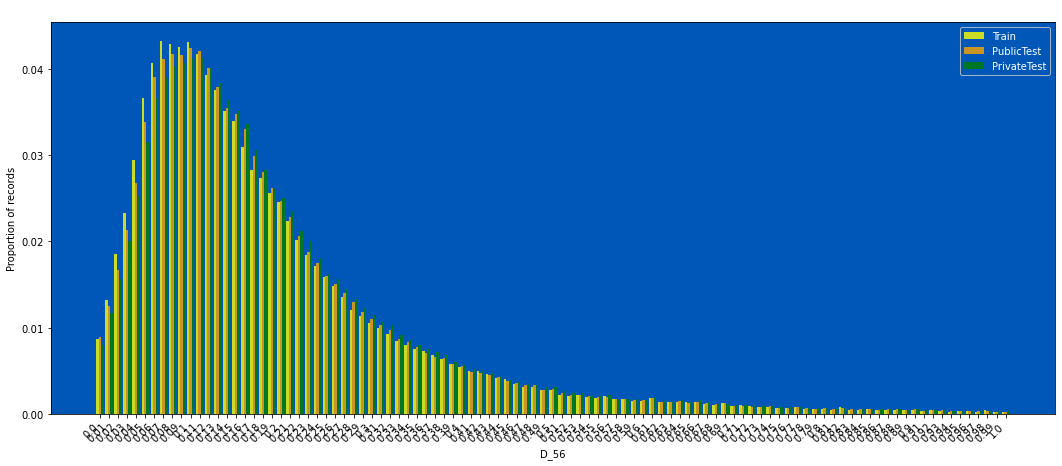

In [158]:
plot_train_test_distribution(df_list, "D_56", nunique_thr=1000)

**Train Test Drift**
- Heavy

### D_58

0 null count, 0.000 null proportion
nan of the targets have label = 1


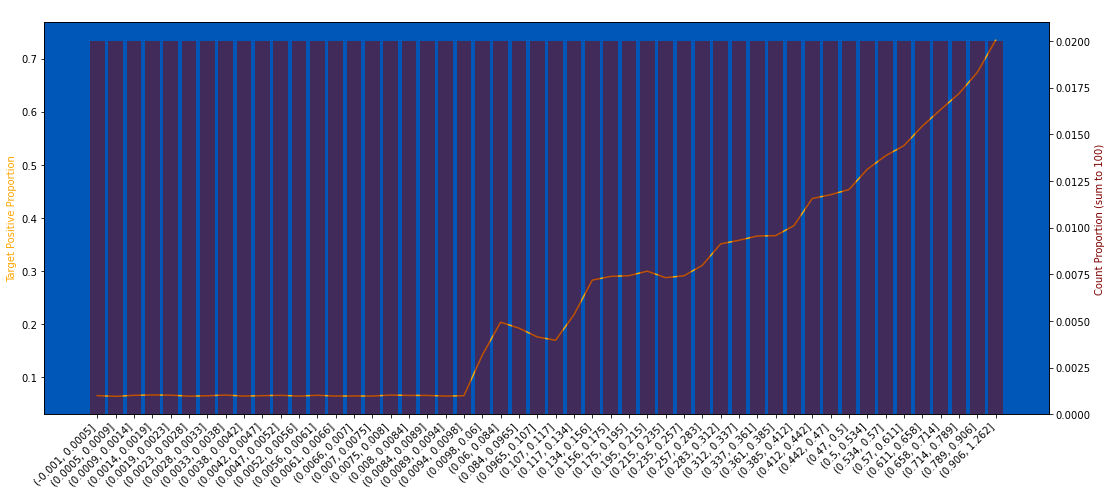

In [159]:
plot_target_check(train, "D_58", q=50, use_raw_bin=True)

In [160]:
%%time
df_list = round_dfs(df_list, col="D_58", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 359 ms, sys: 2.04 s, total: 2.4 s
Wall time: 4.01 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


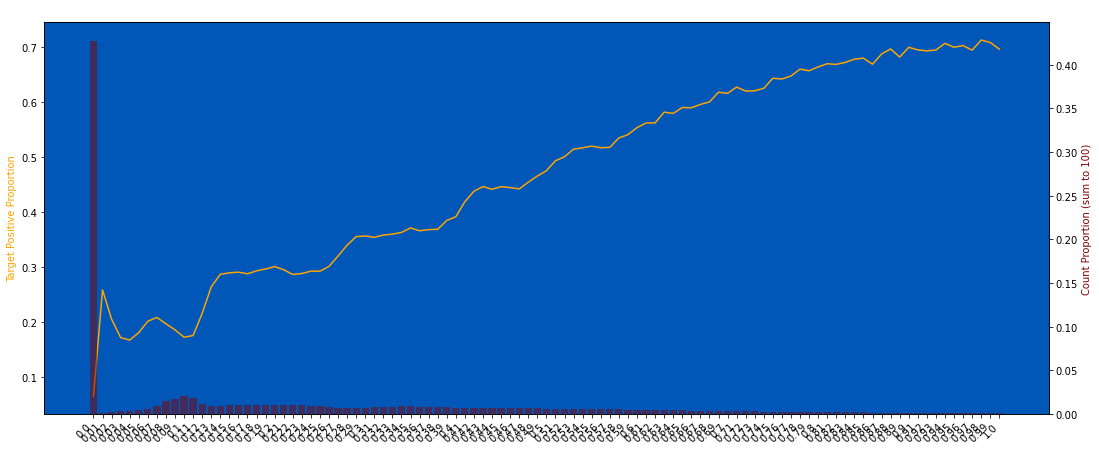

In [161]:
plot_target_check(train, "D_58", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


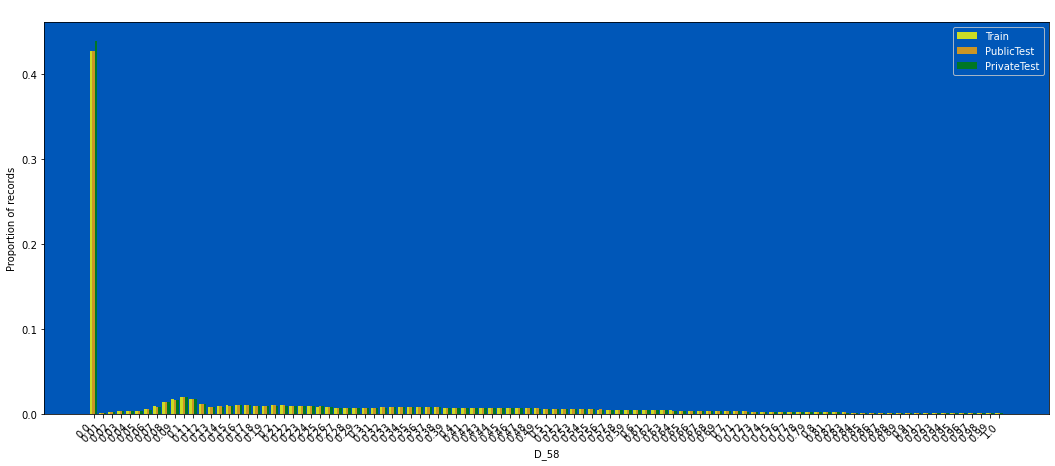

In [162]:
plot_train_test_distribution(df_list, "D_58", nunique_thr=1000)

### D_59

106725 null count, 0.019 null proportion
0.4218 of the targets have label = 1


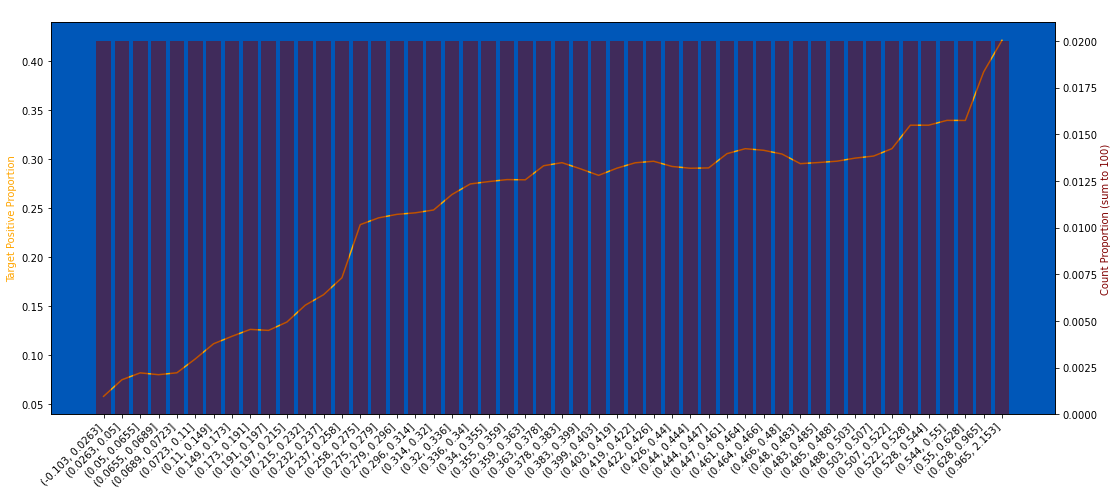

In [163]:
plot_target_check(train, "D_59", q=50, use_raw_bin=True, nunique_thr=1000)

In [164]:
%%time
df_list = round_dfs(df_list, col="D_59", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 329 ms, sys: 1.64 s, total: 1.97 s
Wall time: 3.3 s


Bottom 1% and Top 1% are dropped from this chart


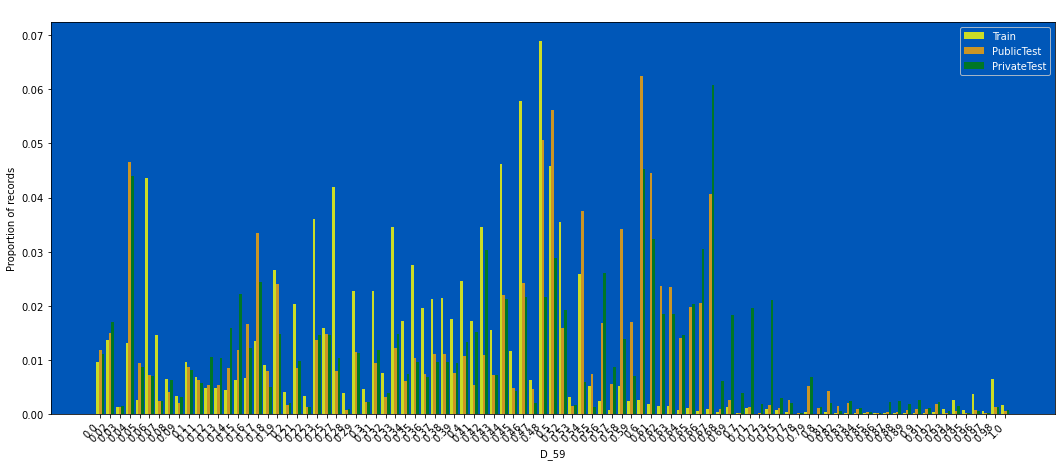

In [165]:
plot_train_test_distribution(df_list, "D_59", nunique_thr=1000)

**Train Test Drift: Extremely Heavy**

### D_60

0 null count, 0.000 null proportion
nan of the targets have label = 1


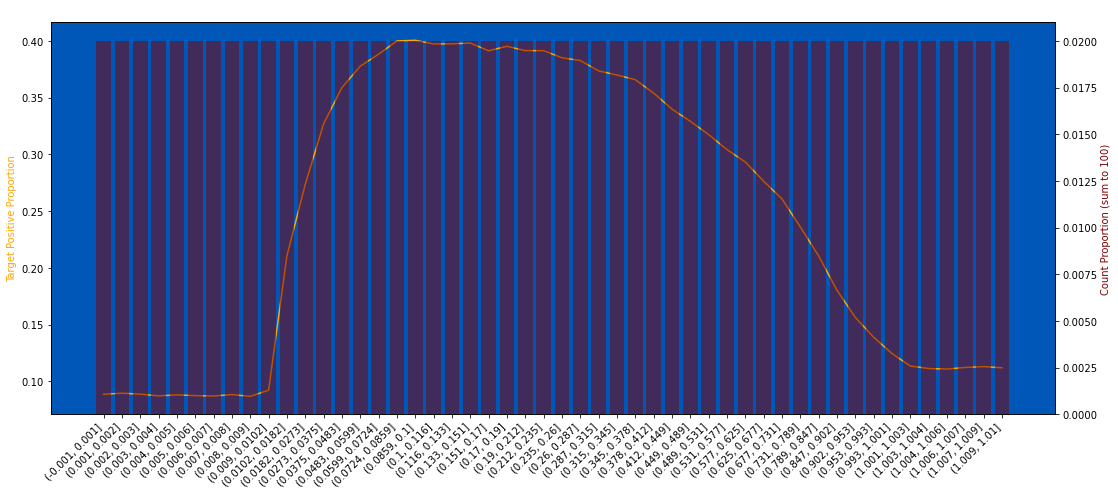

In [166]:
plot_target_check(train, "D_60", q=50, use_raw_bin=True)

In [167]:
%%time
df_list = round_dfs(df_list, col="D_60", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 370 ms, sys: 1.68 s, total: 2.05 s
Wall time: 3.45 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


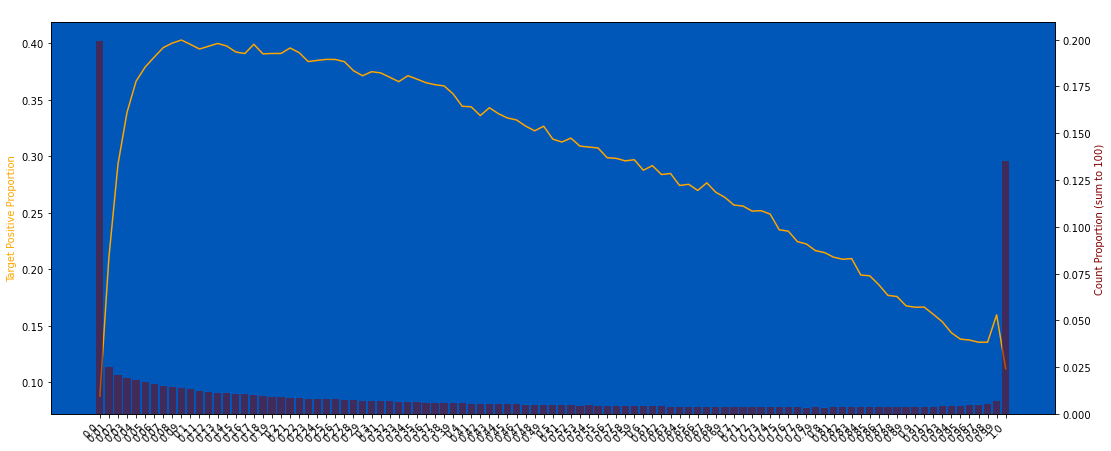

In [169]:
plot_target_check(train, "D_60", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


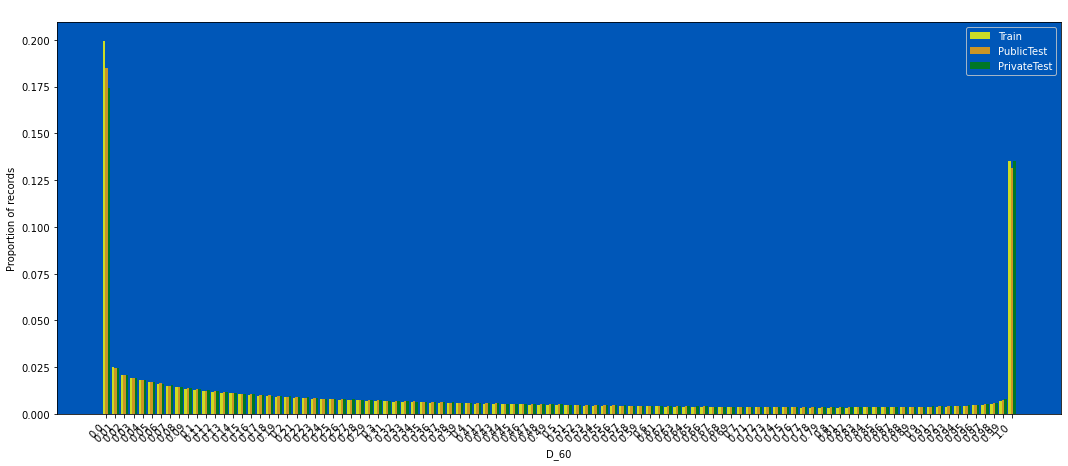

In [170]:
plot_train_test_distribution(df_list, "D_60", nunique_thr=1000)

### D_61

598052 null count, 0.108 null proportion
0.0849 of the targets have label = 1


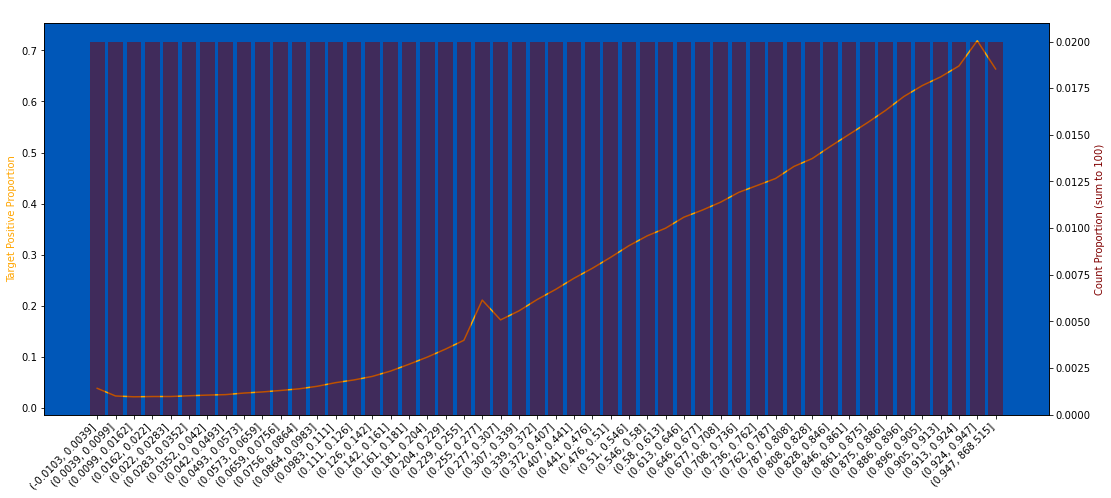

In [171]:
plot_target_check(train, "D_61", q=50, use_raw_bin=True)

In [172]:
%%time
df_list = round_dfs(df_list, col="D_61", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 331 ms, sys: 1.55 s, total: 1.88 s
Wall time: 3.25 s


598052 null count, 0.108 null proportion
0.0849 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


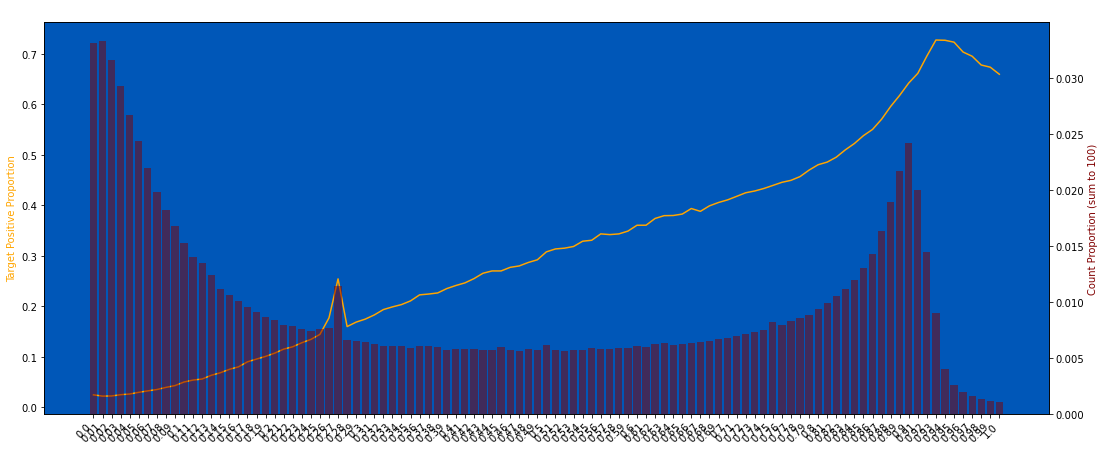

In [173]:
plot_target_check(train, "D_61", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

**ToDo:**
- Identify the spike

Bottom 1% and Top 1% are dropped from this chart


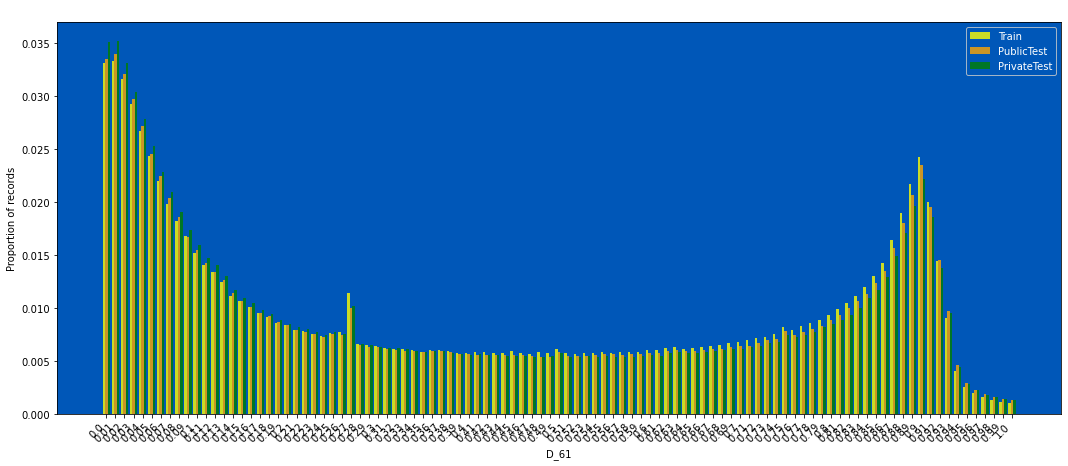

In [175]:
plot_train_test_distribution(df_list, "D_61", nunique_thr=1000)

**Train Test Drift: Moderate**

### D_62

758161 null count, 0.137 null proportion
0.1127 of the targets have label = 1


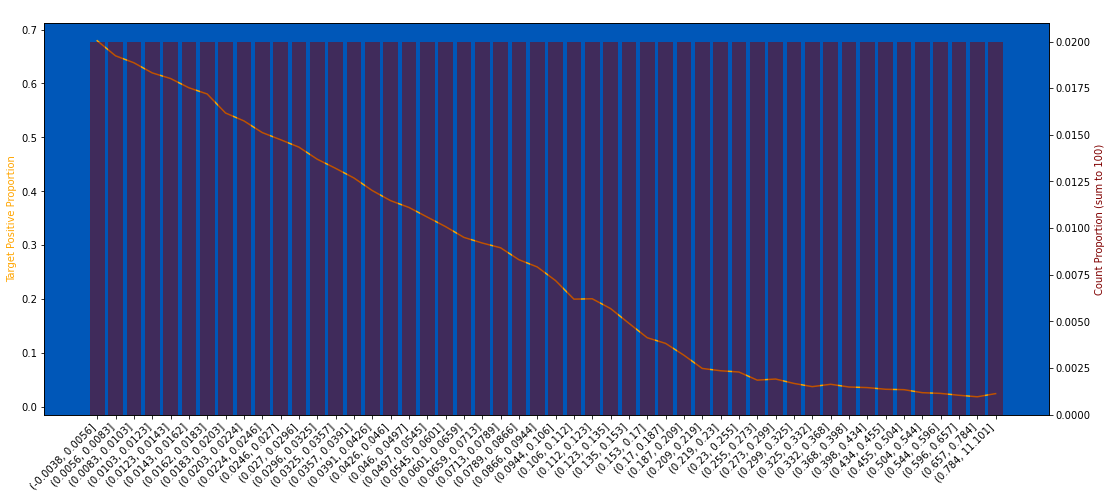

In [176]:
plot_target_check(train, "D_62", q=50, use_raw_bin=True)

In [177]:
%%time
df_list = round_dfs(df_list, col="D_62", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 334 ms, sys: 1.56 s, total: 1.89 s
Wall time: 3.2 s


758161 null count, 0.137 null proportion
0.1127 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


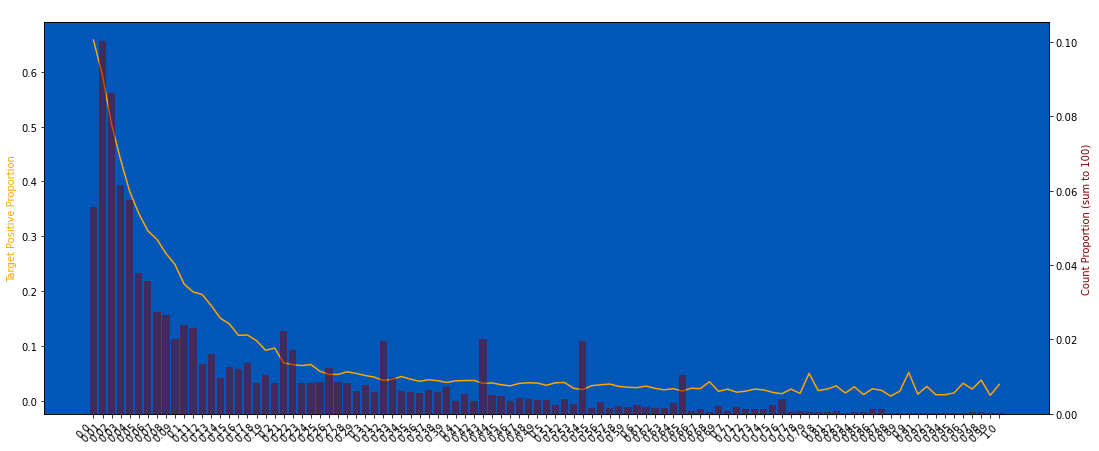

In [178]:
plot_target_check(train, "D_62", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


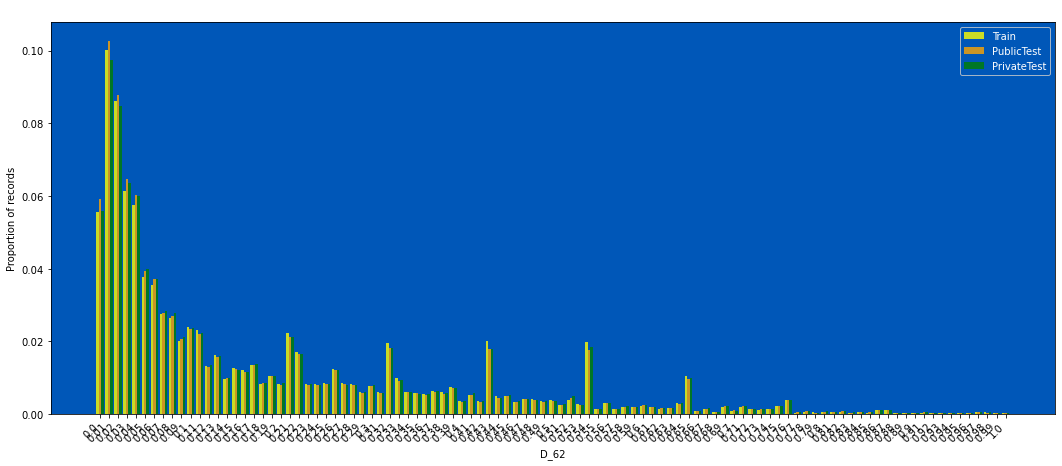

In [179]:
plot_train_test_distribution(df_list, "D_62", nunique_thr=1000)

### D_63

In [181]:
# plot_target_check(train, "D_63", q=50, use_raw_bin=True)

In [ ]:
%%time
df_list = round_dfs(df_list, col="D_63", decimals=2, add_new_col=False)

In [ ]:
plot_train_test_distribution(train, test, "D_63", nunique_thr=1000)

### D_64

In [183]:
# plot_target_check(train, "D_64", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_64", nunique_thr=1000)

### D_65

0 null count, 0.000 null proportion
nan of the targets have label = 1


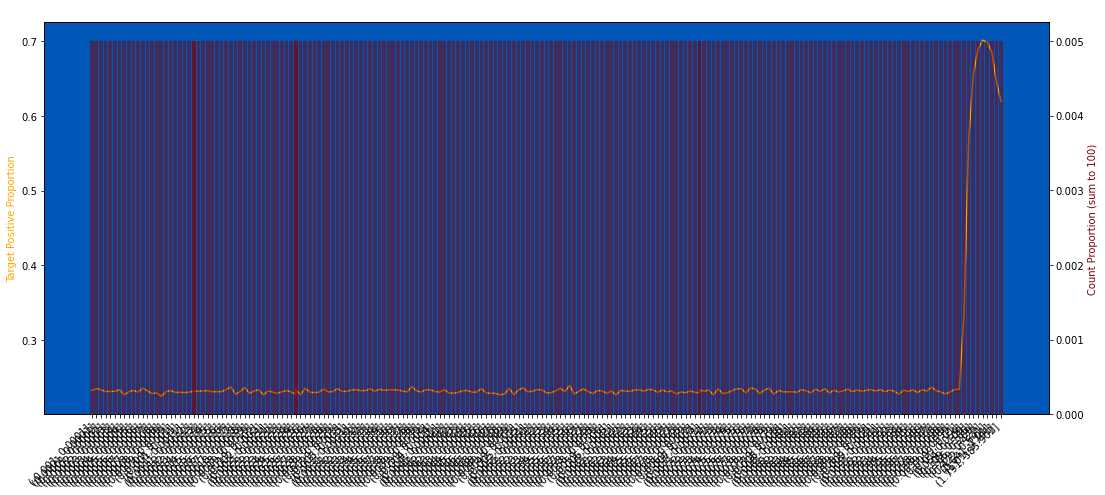

In [184]:
plot_target_check(train, "D_65", q=200, use_raw_bin=True, nunique_thr=1000)

In [185]:
%%time
df_list = round_dfs(df_list, col="D_65", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 348 ms, sys: 1.62 s, total: 1.96 s
Wall time: 3.16 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


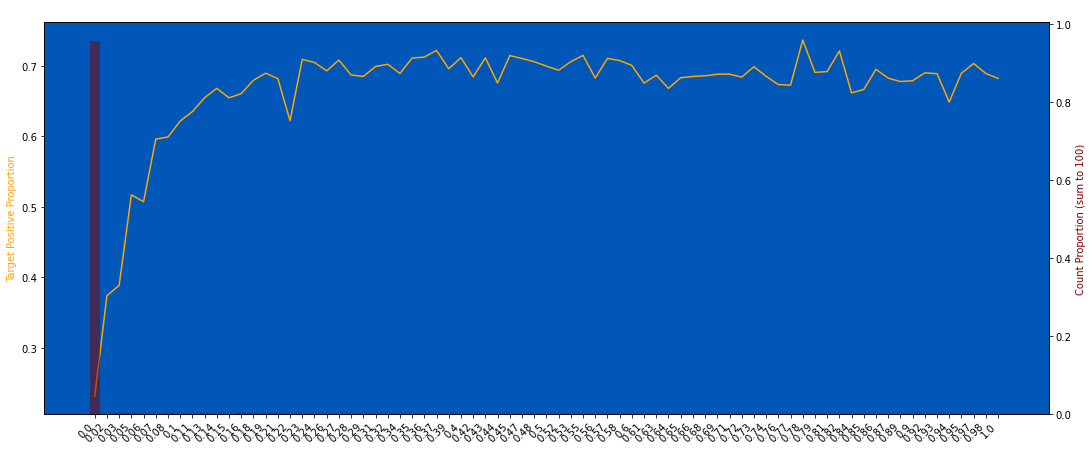

In [196]:
plot_target_check(train, "D_65", q=200, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


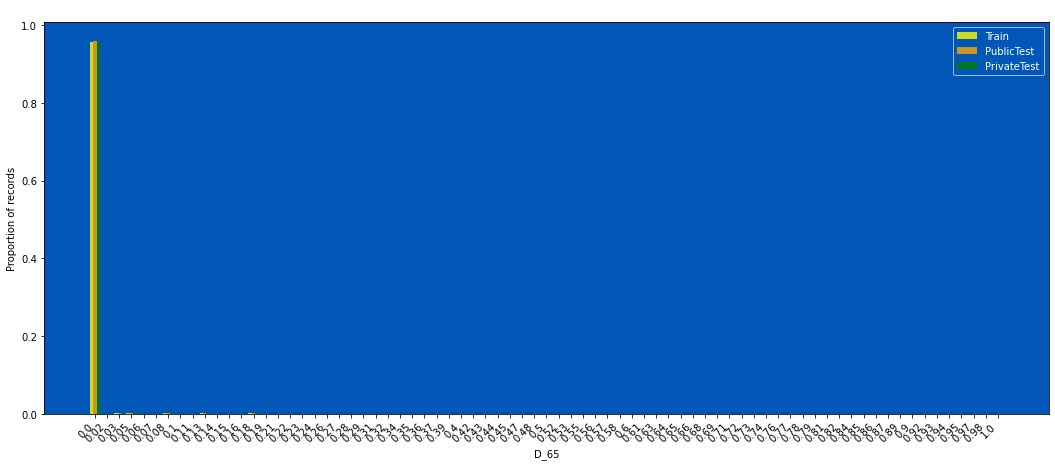

In [216]:
plot_train_test_distribution(df_list, "D_65", nunique_thr=10000)

### D_66

4908097 null count, 0.887 null proportion
0.2572 of the targets have label = 1


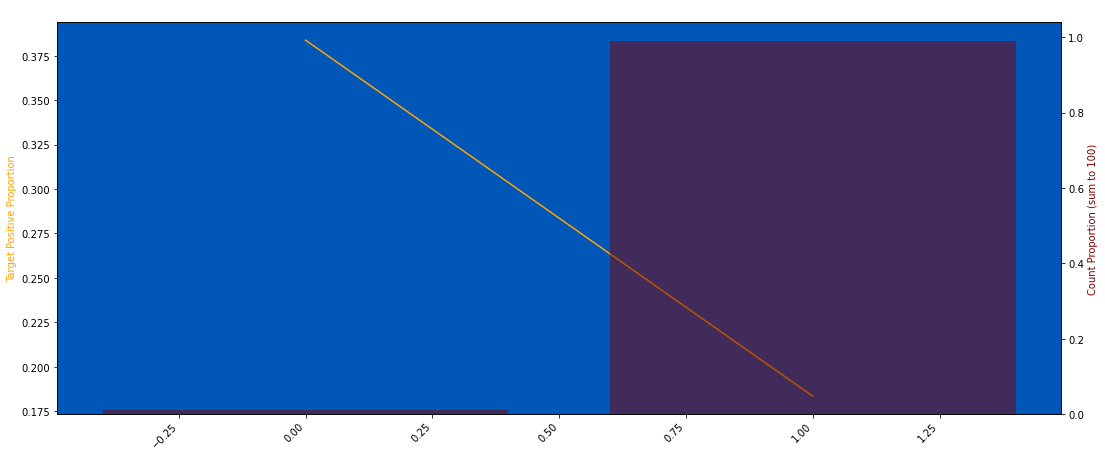

In [219]:
plot_target_check(train, "D_66", q=50, use_raw_bin=True, nunique_thr=50, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


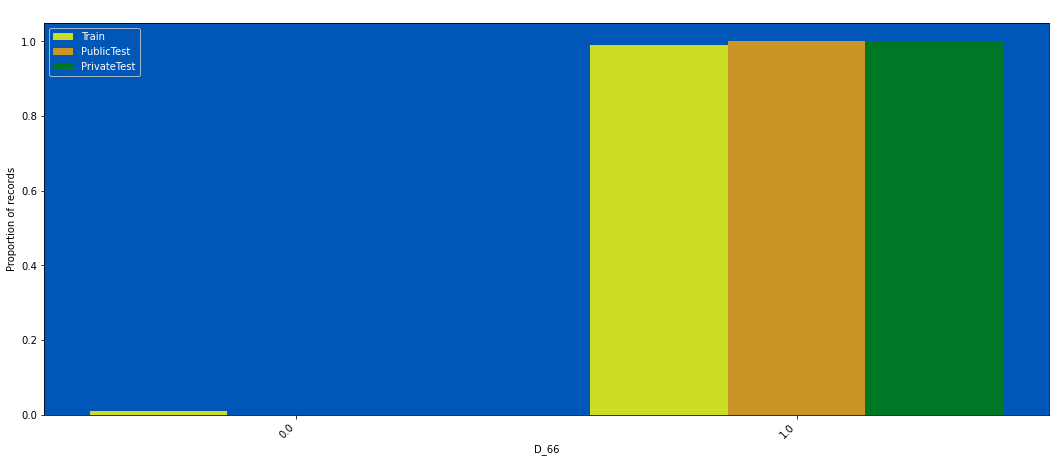

In [221]:
plot_train_test_distribution(df_list, "D_66", nunique_thr=1000)

In [226]:
for df in df_list:
    df = df.drop(columns="D_66", errors="ignore")

### D_68

In [ ]:
plot_target_check(train, "D_68", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_68", nunique_thr=10)

### D_69

194473 null count, 0.035 null proportion
0.4308 of the targets have label = 1


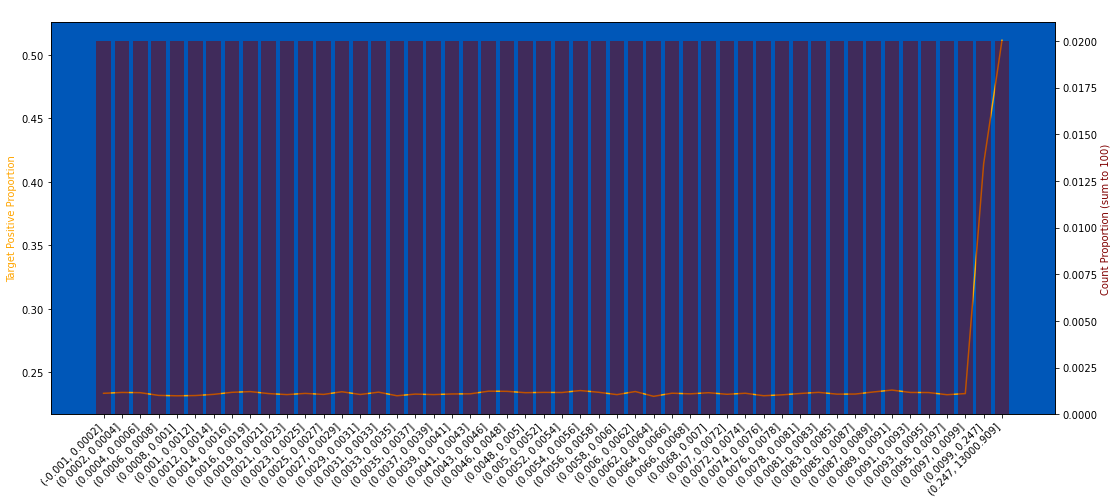

In [227]:
plot_target_check(train, "D_69", q=50, use_raw_bin=True)

In [228]:
%%time
df_list = round_dfs(df_list, col="D_69", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 441 ms, sys: 2.65 s, total: 3.09 s
Wall time: 5.64 s


194473 null count, 0.035 null proportion
0.4308 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


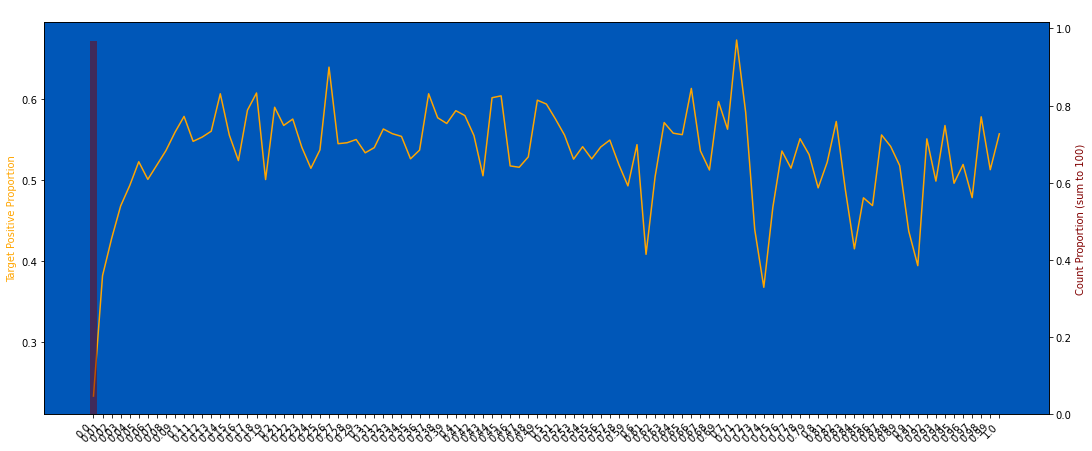

In [229]:
plot_target_check(train, "D_69", q=100, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


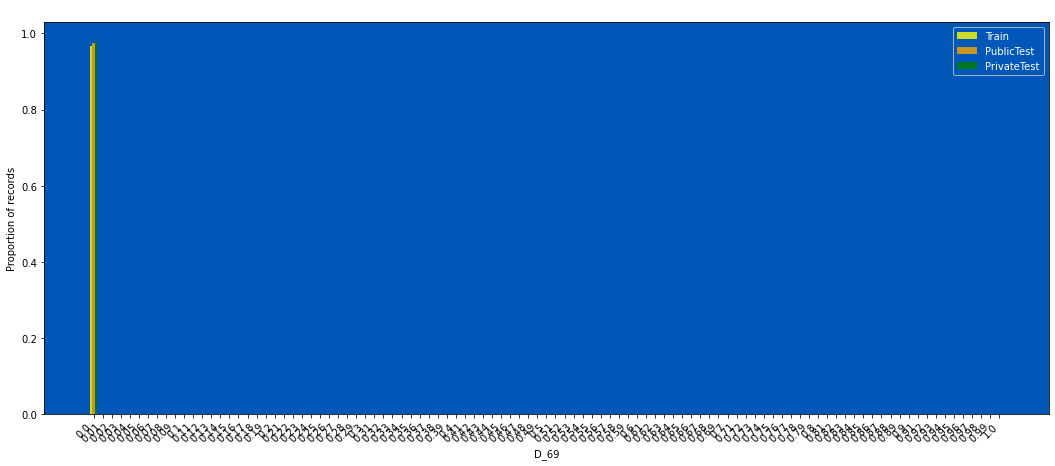

In [230]:
plot_train_test_distribution(df_list, "D_69", nunique_thr=5000)

### D_70

94917 null count, 0.017 null proportion
0.4203 of the targets have label = 1


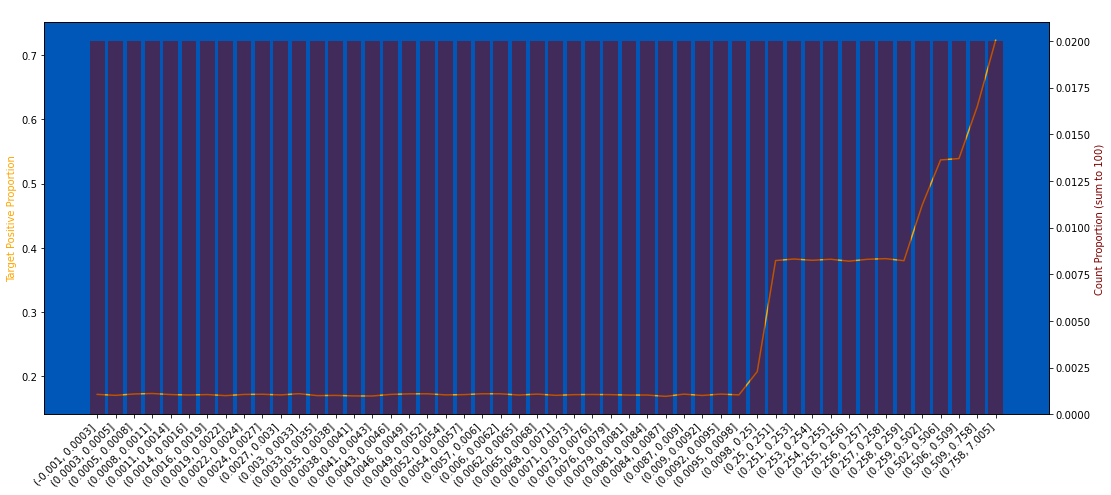

In [231]:
plot_target_check(train, "D_70", q=50, use_raw_bin=True)

In [232]:
%%time
df_list = round_dfs(df_list, col="D_70", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 409 ms, sys: 2.22 s, total: 2.63 s
Wall time: 4.46 s


In [240]:
for df in df_list:
    df["D_70"] = (df["D_70"] * 4).round(0)

94917 null count, 0.017 null proportion
0.4203 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


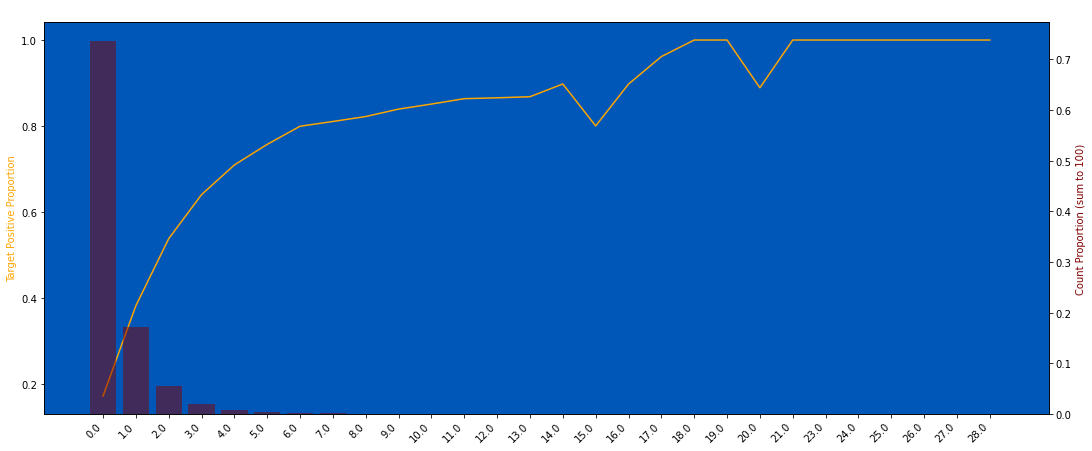

In [241]:
plot_target_check(train, "D_70", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


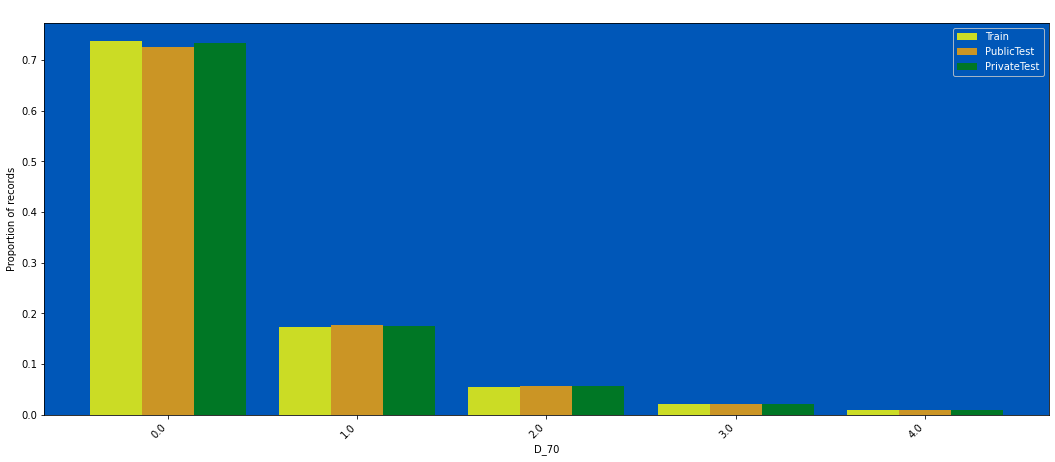

In [242]:
plot_train_test_distribution(df_list, "D_70", nunique_thr=5000)

### D_71

0 null count, 0.000 null proportion
nan of the targets have label = 1


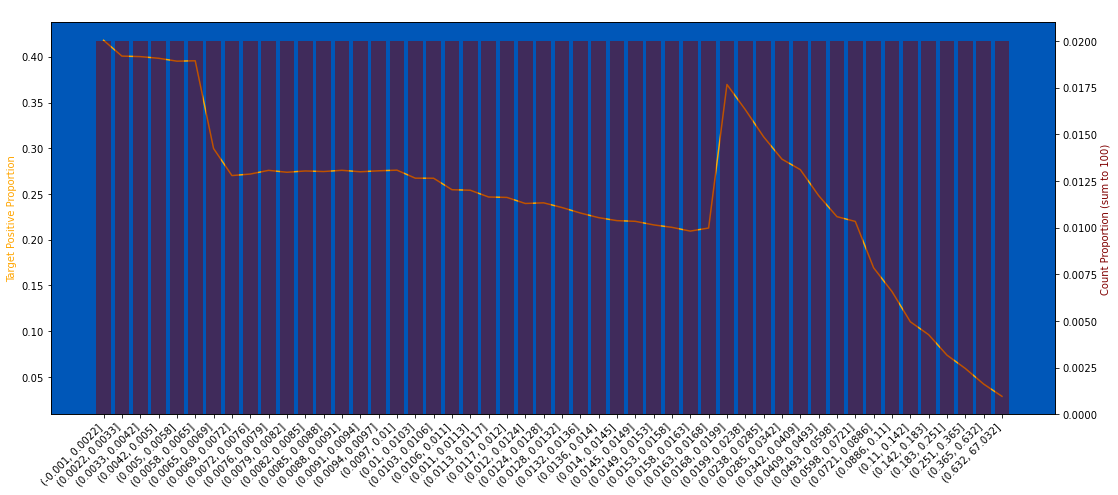

In [243]:
plot_target_check(train, "D_71", q=50, use_raw_bin=True)

In [244]:
%%time
df_list = round_dfs(df_list, col="D_71", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 412 ms, sys: 2.19 s, total: 2.6 s
Wall time: 4.19 s


0 null count, 0.000 null proportion
nan of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


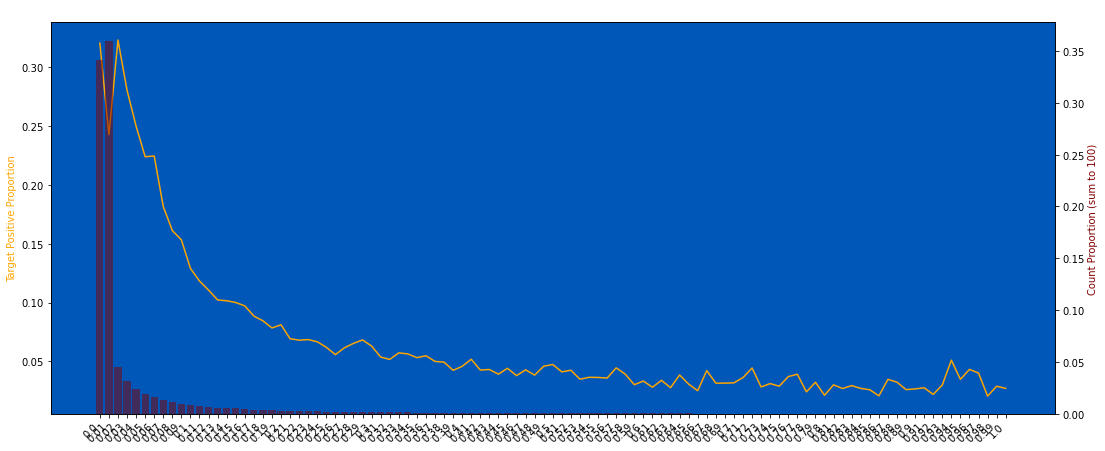

In [245]:
plot_target_check(train, "D_71", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


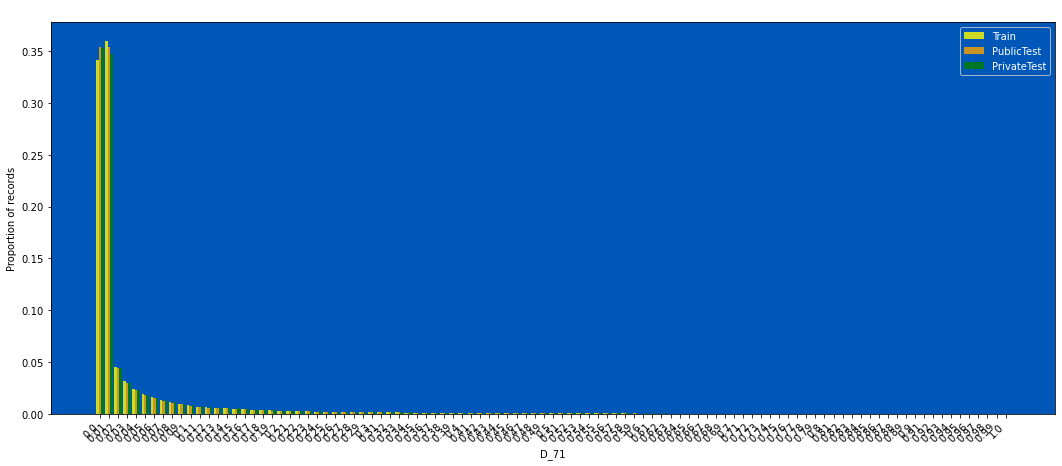

In [246]:
plot_train_test_distribution(df_list, "D_71", nunique_thr=5000)

### D_72

23708 null count, 0.004 null proportion
0.3495 of the targets have label = 1


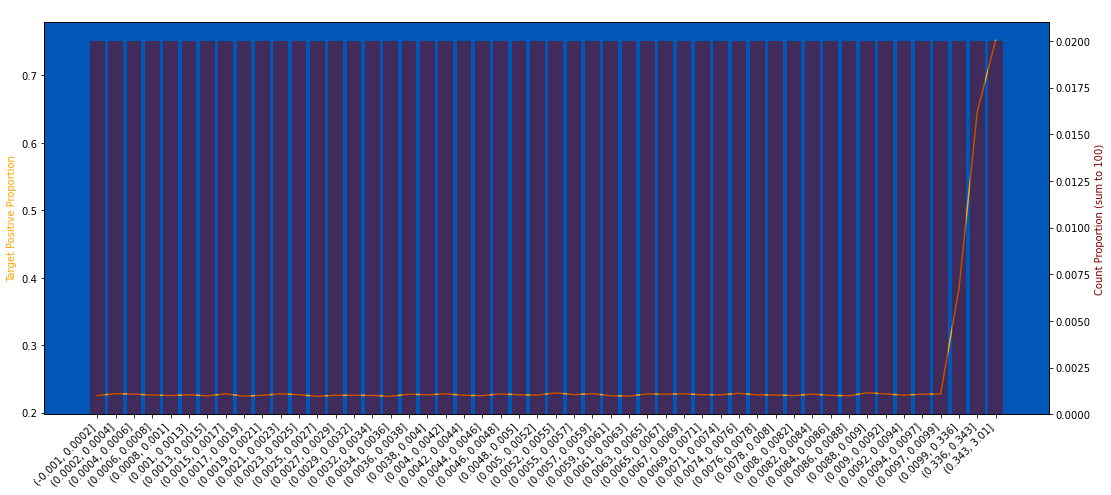

In [247]:
plot_target_check(train, "D_72", q=50, use_raw_bin=True)

In [248]:
%%time
df_list = round_dfs(df_list, col="D_72", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 398 ms, sys: 2.02 s, total: 2.42 s
Wall time: 4.13 s


In [254]:
for df in df_list:
    df["D_72"] = (df["D_72"] * 3).round(0)

23708 null count, 0.004 null proportion
0.3495 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


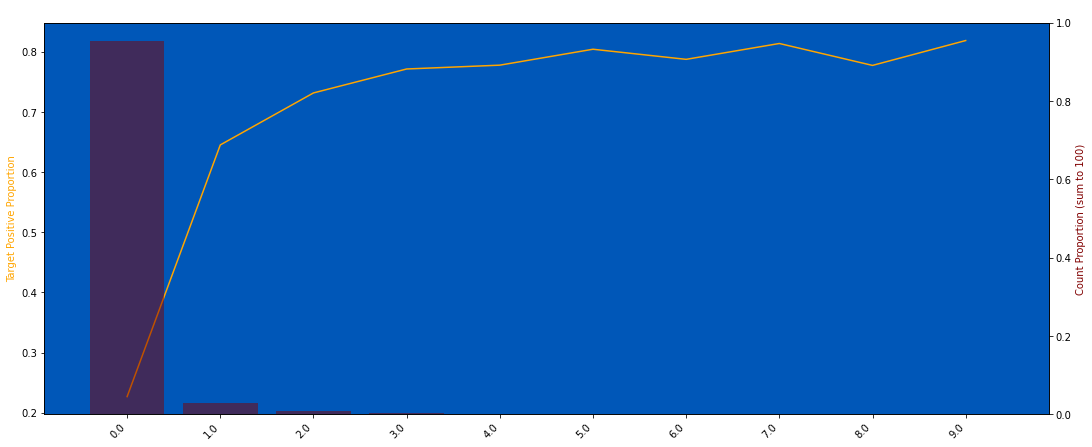

In [255]:
plot_target_check(train, "D_72", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True, without_drop_tail=True)

Bottom 1% and Top 1% are dropped from this chart


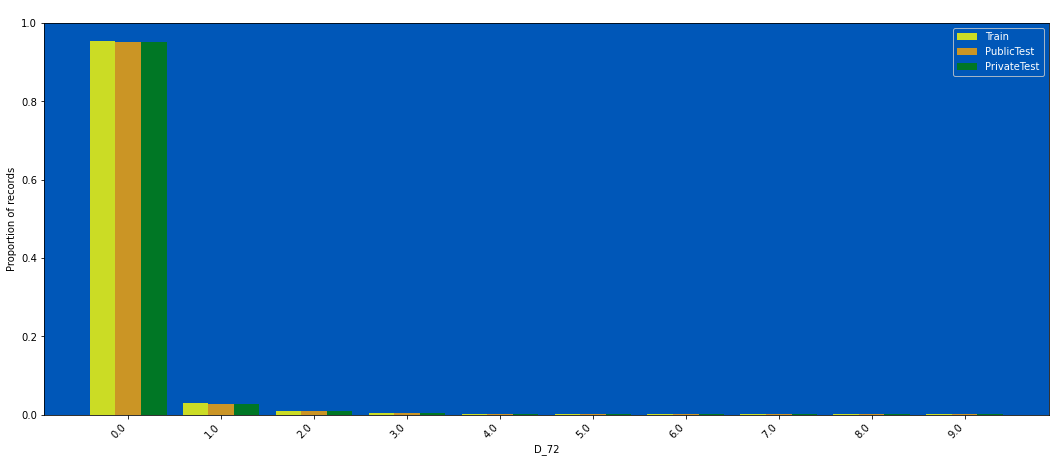

In [257]:
plot_train_test_distribution(df_list, "D_72", nunique_thr=5000, without_drop_tail=True)

### D_73

5475595 null count, 0.990 null proportion
0.2478 of the targets have label = 1


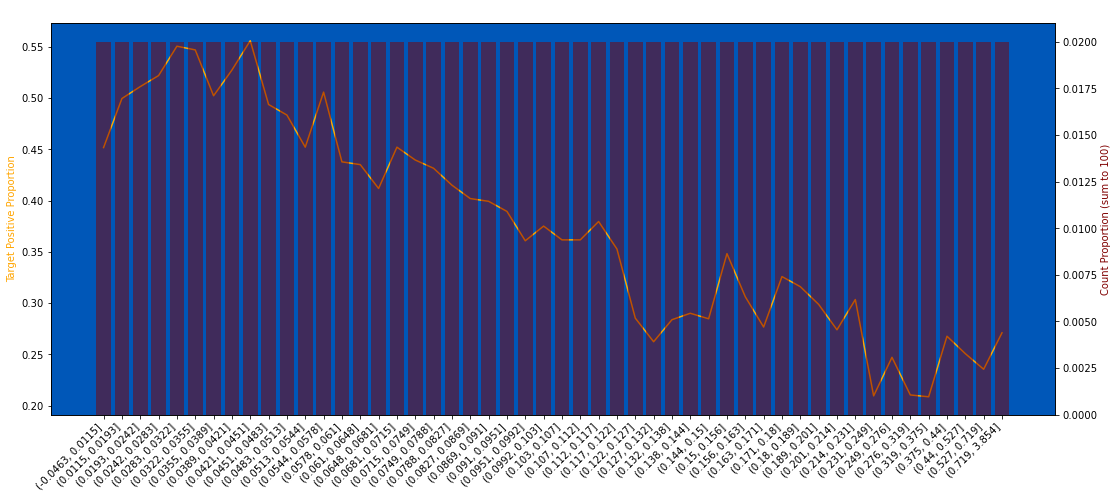

In [258]:
plot_target_check(train, "D_73", q=50, use_raw_bin=True)

In [259]:
%%time
df_list = round_dfs(df_list, col="D_73", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 431 ms, sys: 2.58 s, total: 3.01 s
Wall time: 5.36 s


5475595 null count, 0.990 null proportion
0.2478 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


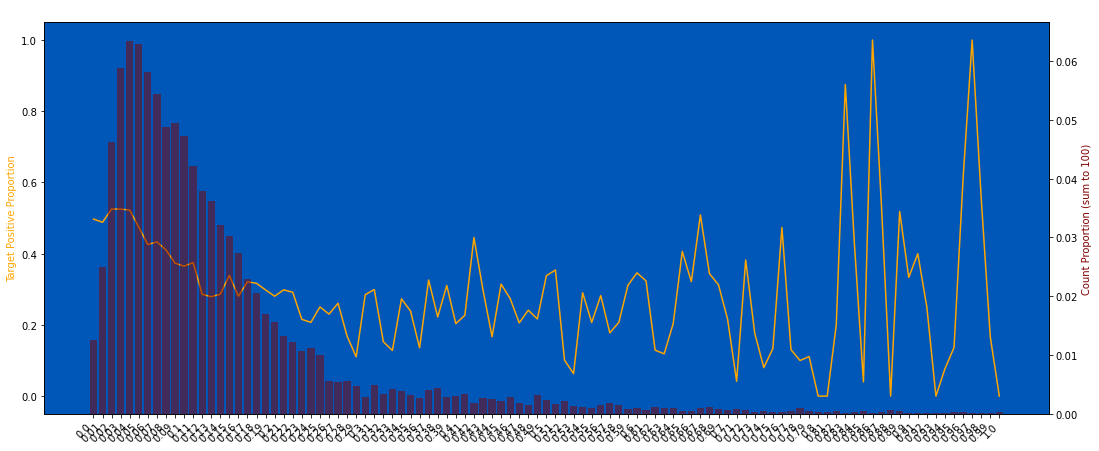

In [260]:
plot_target_check(train, "D_73", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

Bottom 1% and Top 1% are dropped from this chart


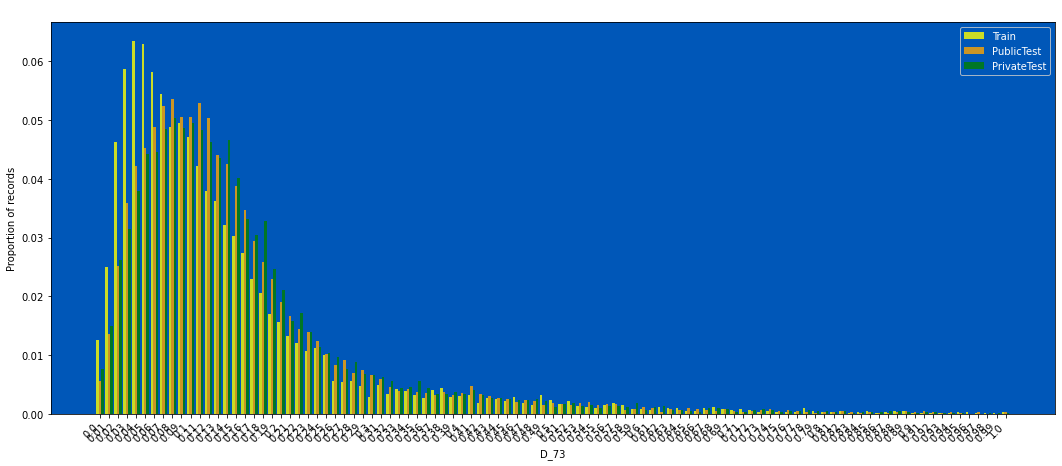

In [261]:
plot_train_test_distribution(df_list, "D_73", nunique_thr=5000)

In [ ]:
xxx

In [270]:
# for df in df_list:
#     df = df.drop(columns="D_73", errors="ignore")

### D_74

21773 null count, 0.004 null proportion
0.1709 of the targets have label = 1


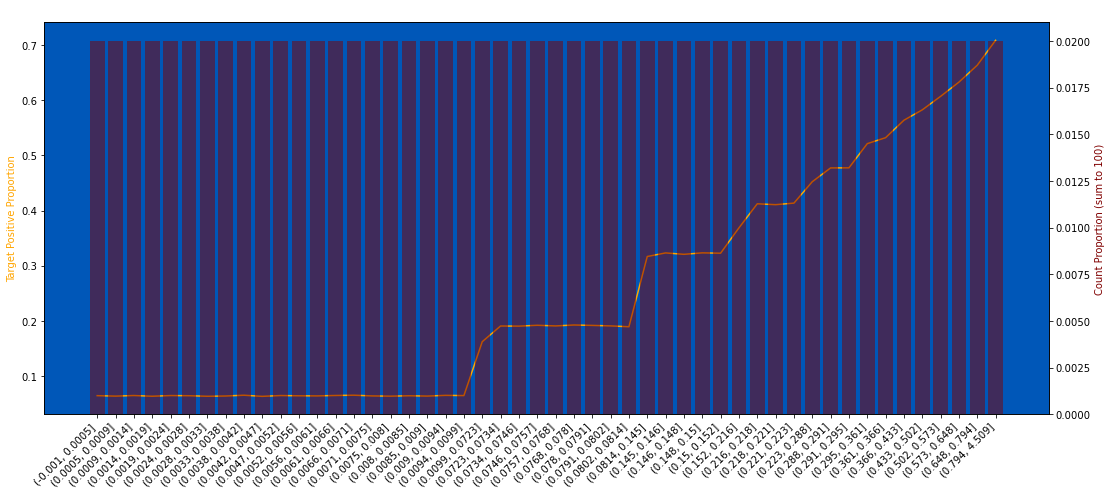

In [271]:
plot_target_check(train, "D_74", q=50, use_raw_bin=True)

In [272]:
%%time
df_list = round_dfs(df_list, col="D_74", decimals=2, add_new_col=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 427 ms, sys: 2.12 s, total: 2.55 s
Wall time: 4.19 s


In [275]:
for df in df_list:
    df["D_74_"] = (df["D_74"] * (100 / 7)).round(0)

21773 null count, 0.004 null proportion
0.1709 of the targets have label = 1
Bottom 1% and Top 1% are dropped from this chart


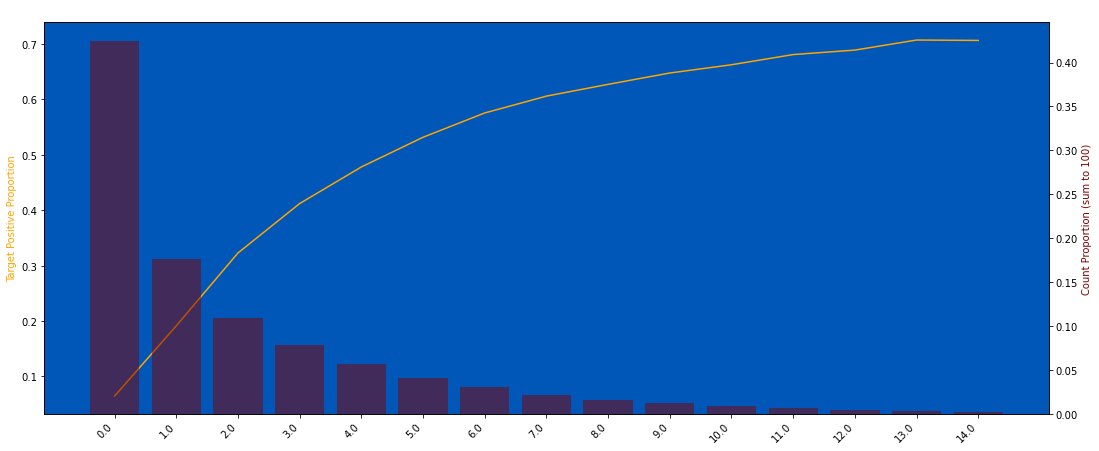

In [276]:
plot_target_check(train, "D_74_", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

In [279]:
# plot_train_test_distribution(df_list, "D_74", nunique_thr=5000)

### D_75

In [ ]:
plot_target_check(train, "D_75", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_75", nunique_thr=5000)

### D_76

In [ ]:
plot_target_check(train, "D_76", q=50, use_raw_bin=True)

In [ ]:
train["D_76"] = train["D_76"].round(2)
test["D_76"] = test["D_76"].round(2)

In [ ]:
plot_target_check(train, "D_76", q=50, use_raw_bin=True, nunique_thr=2000, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_76", nunique_thr=5000)

### D_77

In [ ]:
plot_target_check(train, "D_77", q=50, use_raw_bin=True)

In [ ]:
train["D_77"] = train["D_77"].round(2)
test["D_77"] = test["D_77"].round(2)

In [ ]:
plot_target_check(train, "D_77", q=50, use_raw_bin=True, nunique_thr=2000, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_77", nunique_thr=5000)

### D_78

In [ ]:
plot_target_check(train, "D_78", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_78", nunique_thr=500)

### D_79

In [ ]:
plot_target_check(train, "D_79", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_79", nunique_thr=500)

### D_80

In [ ]:
plot_target_check(train, "D_80", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_80", nunique_thr=500)

### D_81

In [ ]:
plot_target_check(train, "D_81", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_81", nunique_thr=500)

### D_82

In [ ]:
plot_target_check(train, "D_82", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_82", nunique_thr=500)

### D_83

In [ ]:
plot_target_check(train, "D_83", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_83", nunique_thr=500)

### D_84

In [ ]:
plot_target_check(train, "D_84", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_84", nunique_thr=500)

### D_86

In [ ]:
plot_target_check(train, "D_86", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_86", nunique_thr=500)

### D_87

In [ ]:
plot_target_check(train, "D_87", q=100, use_raw_bin=True)

In [ ]:
# %time
# train = train.drop(columns="D_87", errors="ignore")
# test = test.drop(columns="D_87", errors="ignore")

### D_88

In [ ]:
plot_target_check(train, "D_88", q=50, use_raw_bin=True)

In [ ]:
train["D_88"] = train["D_88"].round(2)
test["D_88"] = test["D_88"].round(2)

In [ ]:
plot_target_check(train, "D_88", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_88", nunique_thr=500)

### D_89

In [ ]:
plot_target_check(train, "D_89", q=50, use_raw_bin=True, nunique_thr=12)

In [ ]:
plot_train_test_distribution(train, test, "D_89", nunique_thr=12)

### D_91

In [ ]:
plot_target_check(train, "D_91", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_91", nunique_thr=12)

### D_92

In [ ]:
plot_target_check(train, "D_92", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_92", nunique_thr=12)

### D_93

In [ ]:
plot_target_check(train, "D_93", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_93", nunique_thr=12)

### D_94

In [ ]:
plot_target_check(train, "D_94", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_94", nunique_thr=12)

### D_96

In [ ]:
plot_target_check(train, "D_96", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_96", nunique_thr=12)

### D_102

In [ ]:
plot_target_check(train, "D_102", q=50, use_raw_bin=True)

In [ ]:
train["D_102"] = train["D_102"].round(2)
test["D_102"] = test["D_102"].round(2)

In [ ]:
train.loc[train["D_102"].between(-0.01, 0.01), "D_102"] = np.nan
test.loc[test["D_102"].between(-0.01, 0.01), "D_102"] = np.nan

In [ ]:
plot_target_check(train, "D_102", q=50, use_raw_bin=True, nunique_thr=2000, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_102", nunique_thr=2000)

### D_103

In [ ]:
plot_target_check(train, "D_103", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_103", nunique_thr=12)

### D_104

In [ ]:
plot_target_check(train, "D_104", q=50, use_raw_bin=True)

In [ ]:
train["D_104"] = train["D_104"].round(2)
test["D_104"] = test["D_104"].round(2)

In [ ]:
train.loc[train["D_104"].between(1, 1.01), "D_104"] = 1
test.loc[test["D_104"].between(1, 1.01), "D_104"] = 1

In [ ]:
train.loc[train["D_104"] == 0, "D_104"] = np.nan
test.loc[test["D_104"] == 0, "D_104"] = np.nan

In [ ]:
plot_target_check(train, "D_104", q=50, use_raw_bin=True, nunique_thr=50000, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_104", nunique_thr=3000)

### D_105

In [ ]:
plot_target_check(train, "D_105", q=50, use_raw_bin=True)

In [ ]:
train["D_105"] = train["D_105"].round(2)
test["D_105"] = test["D_105"].round(2)

In [ ]:
plot_target_check(train, "D_105", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_105", nunique_thr=3000)

### D_106

In [ ]:
plot_target_check(train, "D_106", q=50, use_raw_bin=True, nunique_thr=10000, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_106", nunique_thr=3000)

### D_107

In [ ]:
plot_target_check(train, "D_107", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_107", nunique_thr=3000)

### D_108

In [ ]:
plot_target_check(train, "D_108", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_108", nunique_thr=3000)

### D_109

In [ ]:
plot_target_check(train, "D_109", q=2, use_raw_bin=True, nunique_thr=1)

### D_110

In [ ]:
plot_target_check(train, "D_110", q=50, use_raw_bin=True)

In [ ]:
train["D_110"] = train["D_110"].round(2)
test["D_110"] = test["D_110"].round(2)

In [ ]:
plot_target_check(train, "D_110", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_110", nunique_thr=3000)

### D_111

In [ ]:
plot_target_check(train, "D_111", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_111", nunique_thr=3000)

### D_112

In [ ]:
plot_target_check(train, "D_112", q=50, use_raw_bin=True, nunique_thr=1000)

In [ ]:
train["D_112"] = train["D_112"].round(2)
test["D_112"] = test["D_112"].round(2)

In [ ]:
plot_target_check(train, "D_112", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_112", nunique_thr=3000)

### D_113

In [ ]:
plot_target_check(train, "D_113", q=50, use_raw_bin=True, nunique_thr=50)

In [ ]:
plot_train_test_distribution(train, test, "D_113", nunique_thr=3000)

### D_114

In [ ]:
plot_target_check(train, "D_114", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_114", nunique_thr=3000)

### D_115

In [ ]:
plot_target_check(train, "D_115", q=50, use_raw_bin=True)

In [ ]:
train["D_115"] = train["D_115"].round(2)
test["D_115"] = test["D_115"].round(2)

In [ ]:
plot_target_check(train, "D_115", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_115", nunique_thr=500)

### D_116

In [ ]:
plot_target_check(train, "D_116", q=50, use_raw_bin=True, nunique_thr=5)

In [ ]:
plot_train_test_distribution(train, test, "D_116", nunique_thr=5)

### D_117

In [ ]:
plot_target_check(train, "D_117", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_117", nunique_thr=20)

### D_118

In [ ]:
plot_target_check(train, "D_118", q=50, use_raw_bin=True)

In [ ]:
train["D_118"] = train["D_118"].round(2)
test["D_118"] = test["D_118"].round(2)

In [ ]:
plot_target_check(train, "D_118", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

In [ ]:
train.loc[train["D_118"].between(0, 0.01), "D_118"] = np.nan
test.loc[test["D_118"].between(0, 0.01), "D_118"] = np.nan

In [ ]:
plot_target_check(train, "D_118", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_118", nunique_thr=500)

### D_119

In [ ]:
plot_target_check(train, "D_119", q=50, use_raw_bin=True)

In [ ]:
train["D_119"] = train["D_119"].round(2)
test["D_119"] = test["D_119"].round(2)

In [ ]:
train.loc[train["D_119"].between(0, 0.01), "D_119"] = np.nan
test.loc[test["D_119"].between(0, 0.01), "D_119"] = np.nan

In [ ]:
plot_target_check(train, "D_119", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_119", nunique_thr=500)

### D_120

In [ ]:
plot_target_check(train, "D_120", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_120", nunique_thr=500)

### D_121

In [ ]:
plot_target_check(train, "D_121", q=50, use_raw_bin=True)

In [ ]:
train["D_121"] = train["D_121"].round(2)
test["D_121"] = test["D_121"].round(2)

In [ ]:
train.loc[train["D_121"].between(0, 0.01), "D_121"] = np.nan
test.loc[test["D_121"].between(0, 0.01), "D_121"] = np.nan

In [ ]:
plot_target_check(train, "D_121", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_121", nunique_thr=500)

### D_122

In [ ]:
plot_target_check(train, "D_122", q=50, use_raw_bin=True, nunique_thr=100)

In [ ]:
train.loc[train["D_122"] == 0, "D_122"] = np.nan
test.loc[test["D_122"] == 0, "D_122"] = np.nan

In [ ]:
plot_target_check(train, "D_122", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_122", nunique_thr=500)

### D_123

In [ ]:
plot_target_check(train, "D_123", q=50, use_raw_bin=True, nunique_thr=50)

In [ ]:
plot_train_test_distribution(train, test, "D_123", nunique_thr=500)

### D_124

In [ ]:
d124_summary = plot_target_check(train, "D_124", q=50, use_raw_bin=True, return_df=True)

In [ ]:
plot_train_test_distribution(train, test, "D_124", nunique_thr=500)

### D_124a

In [ ]:
d124_summary.loc[d124_summary["D_124"] == d124_summary["D_124"].nlargest(1).values[-1]]

In [ ]:
d124_summary.loc[d124_summary["D_124"] == d124_summary["D_124"].nsmallest(1).values[-1]]

In [ ]:
d124_summary.loc[d124_summary["target_mean"] == d124_summary["target_mean"].min()]

In [ ]:
left_grad = (0.2096 - 0.2957) / (1 - 5)
right_grad = (0.4048 - 0.2096) / (23 - 5)

In [ ]:
train["D_124a"] = (train["D_124"] - 5).apply(lambda x: right_grad * x if x >= 0 else -left_grad * x) * 10
test["D_124a"] = (test["D_124"] - 5).apply(lambda x: right_grad * x if x >= 0 else -left_grad * x) * 10

In [ ]:
plot_target_check(train, "D_124a", q=50, use_raw_bin=True, nunique_thr=200, strfy_x=True, figsize=(25, 10))

In [ ]:
plot_train_test_distribution(train, test, "D_124a", nunique_thr=500)

### D_125

In [ ]:
plot_target_check(train, "D_125", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_125", nunique_thr=500)

### D_126

In [ ]:
plot_target_check(train, "D_126", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_126", nunique_thr=500)

### D_127

In [ ]:
plot_target_check(train, "D_127", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_127", nunique_thr=500)

### D_128

In [ ]:
plot_target_check(train, "D_128", q=50, use_raw_bin=True)

In [ ]:
train["D_128"] = train["D_128"].round(2)
test["D_128"] = test["D_128"].round(2)

In [ ]:
train.loc[train["D_128"].between(1, 1.01), "D_128"] = 1
test.loc[test["D_128"].between(1, 1.01), "D_128"] = 1

In [ ]:
plot_target_check(train, "D_128", q=50, use_raw_bin=True, nunique_thr=5000, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_128", nunique_thr=500)

### D_129

In [ ]:
plot_target_check(train, "D_129", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_129", nunique_thr=500)

### D_130

In [ ]:
plot_target_check(train, "D_130", q=50, use_raw_bin=True)

In [ ]:
train["D_130"] = train["D_130"].round(2)
test["D_130"] = test["D_130"].round(2)

In [ ]:
train.loc[train["D_130"].between(1, 1.01), "D_130"] = 1
test.loc[test["D_130"].between(1, 1.01), "D_130"] = 1

In [ ]:
plot_target_check(train, "D_130", q=50, use_raw_bin=True, nunique_thr=100, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_130", nunique_thr=500)

### D_131

In [ ]:
plot_target_check(train, "D_131", q=50, use_raw_bin=True)

In [ ]:
train["D_131"] = train["D_131"].round(2)
test["D_131"] = test["D_131"].round(2)

In [ ]:
train.loc[train["D_131"] == 0, "D_131"] = np.nan
test.loc[test["D_131"] == 0, "D_131"] = np.nan

In [ ]:
plot_target_check(train, "D_131", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_131", nunique_thr=500)

### D_132

In [ ]:
plot_target_check(train, "D_132", q=50, use_raw_bin=True)

In [ ]:
train["D_132"] = train["D_132"].round(2)
test["D_132"] = test["D_132"].round(2)

In [ ]:
plot_target_check(train, "D_132", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_132", nunique_thr=5000)

### D_133

In [ ]:
plot_target_check(train, "D_133", q=50, use_raw_bin=True)

In [ ]:
train["D_133"] = train["D_133"].round(2)
test["D_133"] = test["D_133"].round(2)

In [ ]:
train.loc[train["D_133"].between(0, 0.01), "D_133"] = np.nan
test.loc[test["D_133"].between(0, 0.01), "D_133"] = np.nan

In [ ]:
plot_target_check(train, "D_133", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_133", nunique_thr=5000)

### D_134

In [ ]:
plot_target_check(train, "D_134", q=50, use_raw_bin=True)

In [ ]:
train["D_134"] = train["D_134"].round(2)
test["D_134"] = test["D_134"].round(2)

In [ ]:
train.loc[train["D_134"].between(1, 1.01), "D_134"] = 1
test.loc[test["D_134"].between(1, 1.01), "D_134"] = 1

In [ ]:
plot_target_check(train, "D_134", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_134", nunique_thr=5000)

### D_135

In [ ]:
plot_target_check(train, "D_135", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_135", nunique_thr=5000)

### D_136

In [ ]:
plot_target_check(train, "D_136", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_136", nunique_thr=5000)

### D_137

In [ ]:
plot_target_check(train, "D_137", q=50, use_raw_bin=True, nunique_thr=10)

In [ ]:
plot_train_test_distribution(train, test, "D_137", nunique_thr=10)

### D_138

In [ ]:
plot_target_check(train, "D_138", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_138", nunique_thr=100)

### D_139

In [ ]:
plot_target_check(train, "D_139", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_139", nunique_thr=5)

### D_140

In [ ]:
plot_target_check(train, "D_140", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_140", nunique_thr=5)

### D_141

In [ ]:
plot_target_check(train, "D_141", q=50, use_raw_bin=True)

In [ ]:
train["D_141"] = train["D_141"].round(2)
test["D_141"] = test["D_141"].round(2)

In [ ]:
train.loc[train["D_141"] == 0, "D_141"] = np.nan
test.loc[test["D_141"] == 0, "D_141"] = np.nan

In [ ]:
plot_target_check(train, "D_141", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_141", nunique_thr=500)

### D_142

In [ ]:
plot_target_check(train, "D_142", q=50, use_raw_bin=True)

In [ ]:
train["D_142"] = train["D_142"].round(2)
test["D_142"] = test["D_142"].round(2)

In [ ]:
plot_target_check(train, "D_142", q=50, use_raw_bin=True, nunique_thr=500, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_142", nunique_thr=500)

### D_143

In [ ]:
plot_target_check(train, "D_143", q=50, use_raw_bin=True)

In [ ]:
plot_train_test_distribution(train, test, "D_143", nunique_thr=500)

### D_144

In [ ]:
plot_target_check(train, "D_144", q=50, use_raw_bin=True)

In [ ]:
train["D_144"] = train["D_144"].round(2)
test["D_144"] = test["D_144"].round(2)

In [ ]:
plot_target_check(train, "D_144", q=50, use_raw_bin=True, nunique_thr=1000, strfy_x=True)

In [ ]:
plot_train_test_distribution(train, test, "D_144", nunique_thr=500)

### D_145

In [ ]:
plot_target_check(train, "D_145", q=50, use_raw_bin=True, nunique_thr=1000)

In [ ]:
plot_train_test_distribution(train, test, "D_145", nunique_thr=500)

### Column checking

In [ ]:
from tqdm import tqdm

In [ ]:
all_columns = get_cols(train, "D_")

In [ ]:
for d in tqdm(all_columns):
    neg1_series = train.loc[train[d] == -1, d]
    if len(neg1_series) > 0:
        print("Train", d, len(neg1_series))
        train[d] = train[d].replace(-1, -999)
    neg1_series = test.loc[test[d] == -1, d]
    if len(neg1_series) > 0:
        print("Test", d, len(neg1_series))
        test[d] = test[d].replace(-1, -999)

In [ ]:
for d in tqdm(all_columns):
    neg1_series = train.loc[train[d] == -999, d]
    if len(neg1_series) > 0:
        print("Train", d, len(neg1_series))
        train[d] = train[d].replace(-999, -1)
    neg1_series = test.loc[test[d] == -999, d]
    if len(neg1_series) > 0:
        print("Test", d, len(neg1_series))
        test[d] = test[d].replace(-999, -1)

In [ ]:
d_col_nunique = train[all_columns].nunique()

In [ ]:
less_unique_d_cols = d_col_nunique[d_col_nunique < 64].index.tolist()

In [ ]:
for d in less_unique_d_cols:
    print(d, ":", train[d].dtype, "\n", sorted(train[d].unique().tolist()), "\n")

In [ ]:
# for col in tqdm(less_unique_d_cols):
#     train[col] = integerize(train[col])
#     test[col] = integerize(test[col])

In [ ]:
%%time
train = train.drop(columns="temp", errors="ignore")
test = test.drop(columns="temp", errors="ignore")

In [ ]:
train.shape, test.shape

### Insert row_number

In [ ]:
%%time
if "row_number" not in train:
    insert_row_number(train)
    insert_row_number(test)

In [ ]:
# %%time
train.to_parquet(f"{RAW_TRAIN_PARQUET_PATH}/train_psrbd.parquet")
test.to_parquet(f"{RAW_TEST_PARQUET_PATH}/test_psrbd.parquet")

In [ ]:
END = time.time()

In [ ]:
print(f"{END - START:.2f} seconds elapsed")